In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
plt.rcParams['figure.figsize'] = (20, 6)  # Again because some issue with google colab


In [3]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg


Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /Workspace/PythonWorkspace/Scaler-DSML/10_Unsupervised_RecSys/02_Time_Series_1/mobilesales.xlsx
100%|██████████████████████████████████████| 13.7k/13.7k [00:00<00:00, 39.0MB/s]


In [4]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

DATE   Sales
0 2001-01-01  6519.0
1 2001-02-01  6654.0
2 2001-03-01  7332.0
3 2001-04-01  7332.0
4 2001-05-01  8240.0

In [5]:
mobile_sales.tail()

DATE    Sales
212 2018-09-01  13838.0
213 2018-10-01  15351.0
214 2018-11-01  15615.0
215 2018-12-01  16941.0
216 2019-01-01  12160.0

In [6]:
mobile_sales.dtypes


DATE     datetime64[ns]
Sales           float64
dtype: object

In [7]:
## pd.to_datetime("column_name")

In [8]:
mobile_sales.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

In [9]:
mobile_sales.DATE.describe()

count                              217
mean     2009-12-31 04:25:26.267281152
min                2001-01-01 00:00:00
25%                2005-07-01 00:00:00
50%                2010-01-01 00:00:00
75%                2014-07-01 00:00:00
max                2019-01-01 00:00:00
Name: DATE, dtype: object

In [10]:
mobile_sales.index


RangeIndex(start=0, stop=217, step=1)

In [11]:
mobile_sales.set_index('DATE', inplace = True)

In [12]:
mobile_sales

Sales
DATE               
2001-01-01   6519.0
2001-02-01   6654.0
2001-03-01   7332.0
2001-04-01   7332.0
2001-05-01   8240.0
...             ...
2018-09-01  13838.0
2018-10-01  15351.0
2018-11-01  15615.0
2018-12-01  16941.0
2019-01-01  12160.0

[217 rows x 1 columns]

<Axes: xlabel='DATE'>

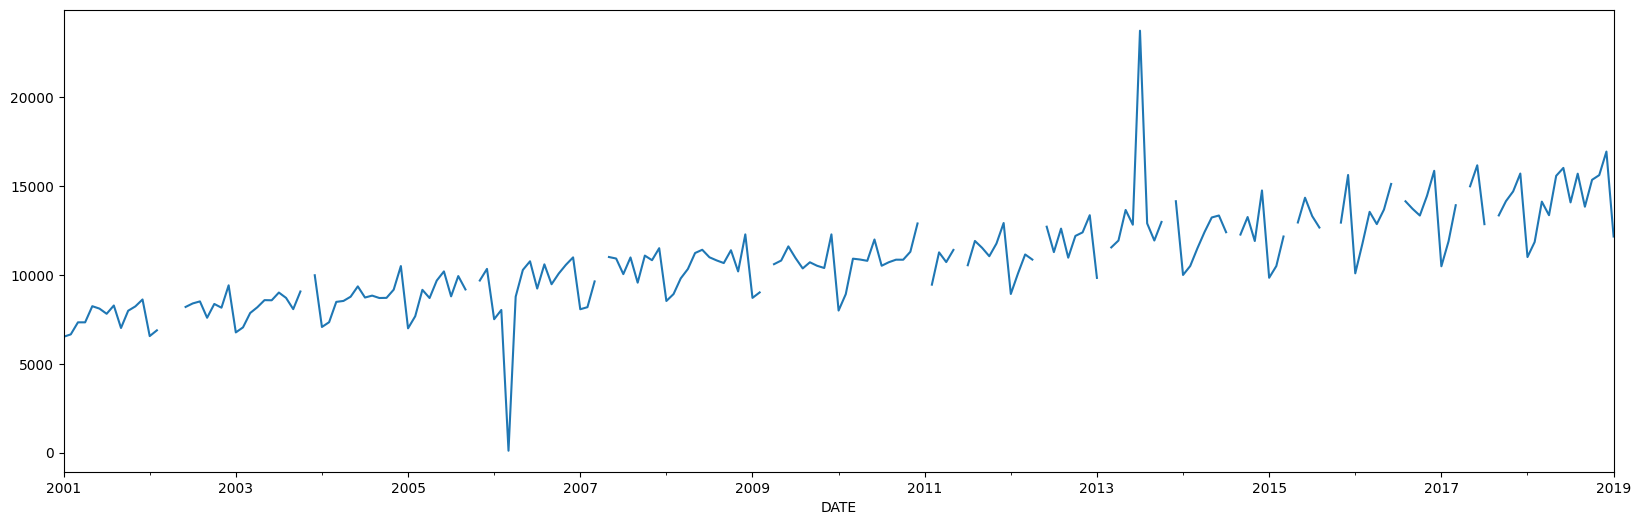

In [13]:
mobile_sales.Sales.plot()

In [14]:
mobile_sales.isna().sum()

Sales    19
dtype: int64

In [15]:
mobile_sales.loc[mobile_sales.Sales.isna()]

Sales
DATE             
2002-03-01    NaN
2002-04-01    NaN
2002-05-01    NaN
2003-11-01    NaN
2005-10-01    NaN
2007-04-01    NaN
2009-03-01    NaN
2011-01-01    NaN
2011-06-01    NaN
2012-05-01    NaN
2013-02-01    NaN
2013-11-01    NaN
2014-08-01    NaN
2015-04-01    NaN
2015-09-01    NaN
2015-10-01    NaN
2016-07-01    NaN
2017-04-01    NaN
2017-08-01    NaN

## Handle Missing values

In [16]:
mobile_sales.Sales.mean()

10842.757575757576

In [17]:
mobile_sales.Sales.median()

10745.0

<Axes: xlabel='DATE'>

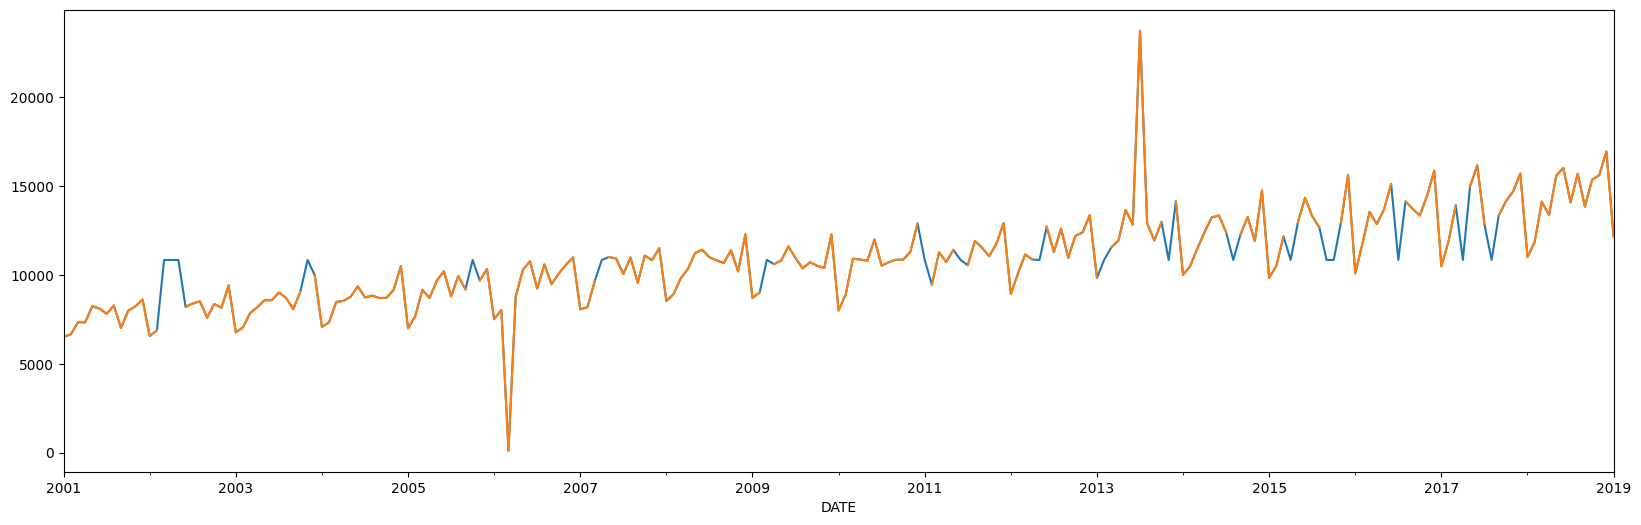

In [18]:
mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label = 'imputed mean')
mobile_sales.Sales.plot(label = 'original')

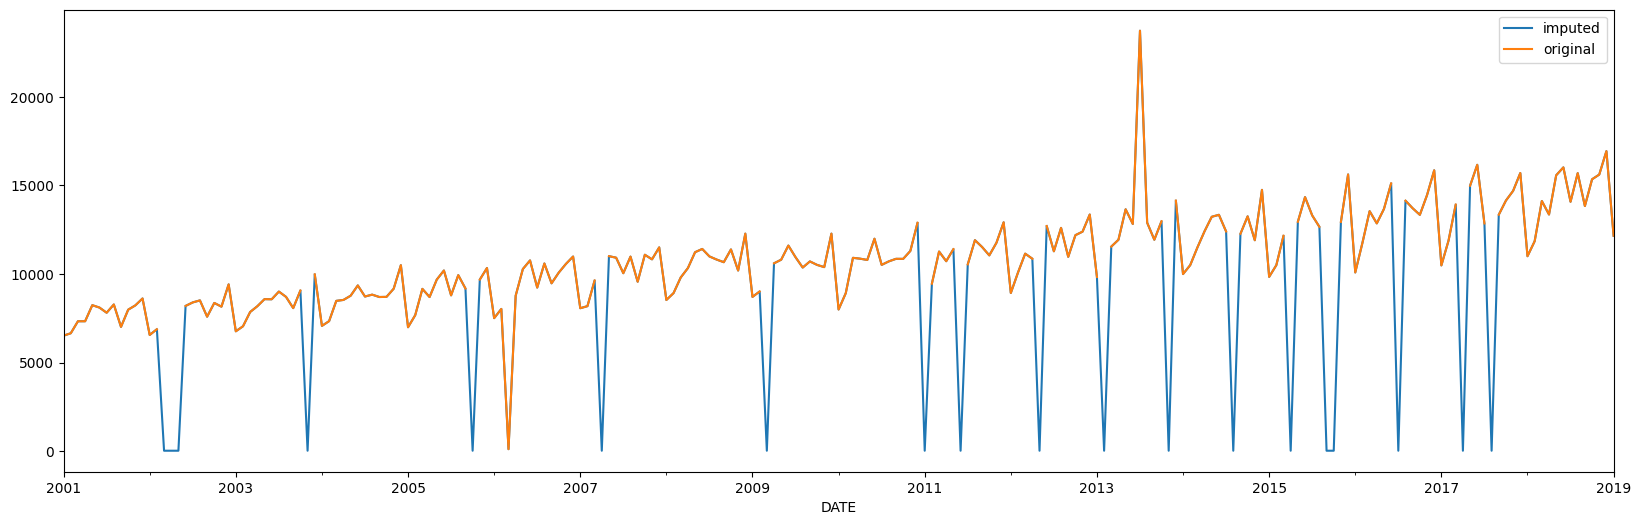

In [19]:
mobile_sales.Sales.fillna(20).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

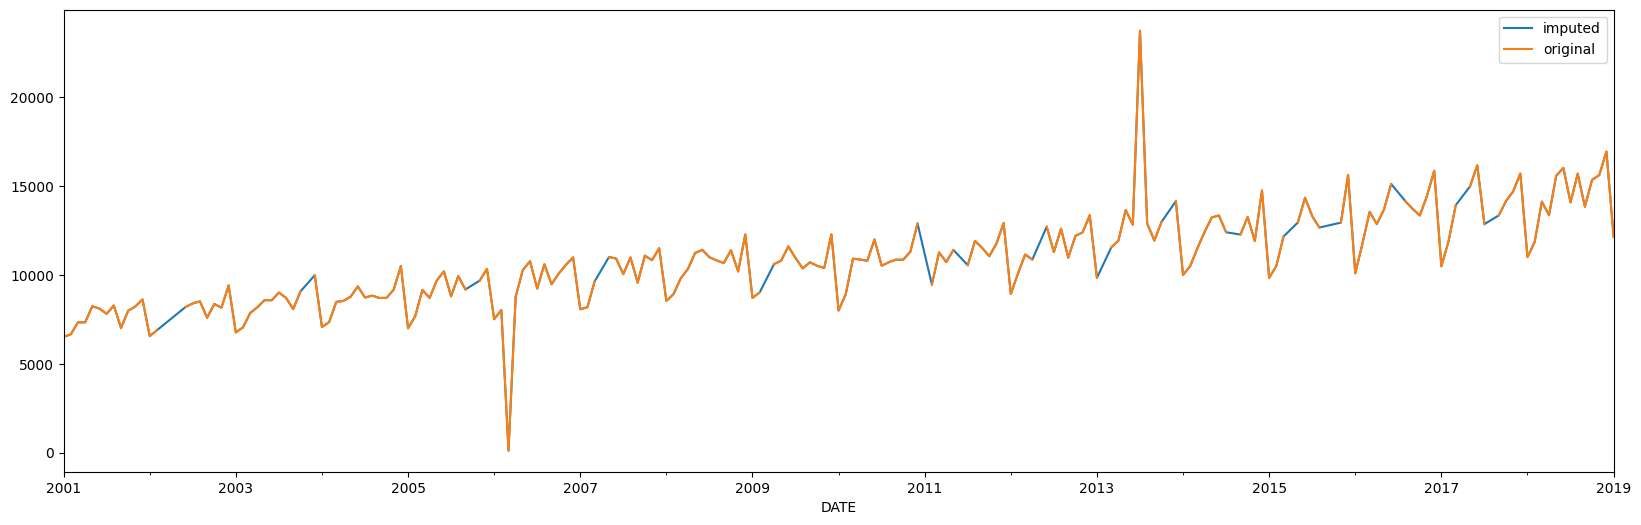

In [20]:
mobile_sales.Sales.interpolate(method = 'linear').plot(label = 'imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

In [21]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method = 'linear')

[]

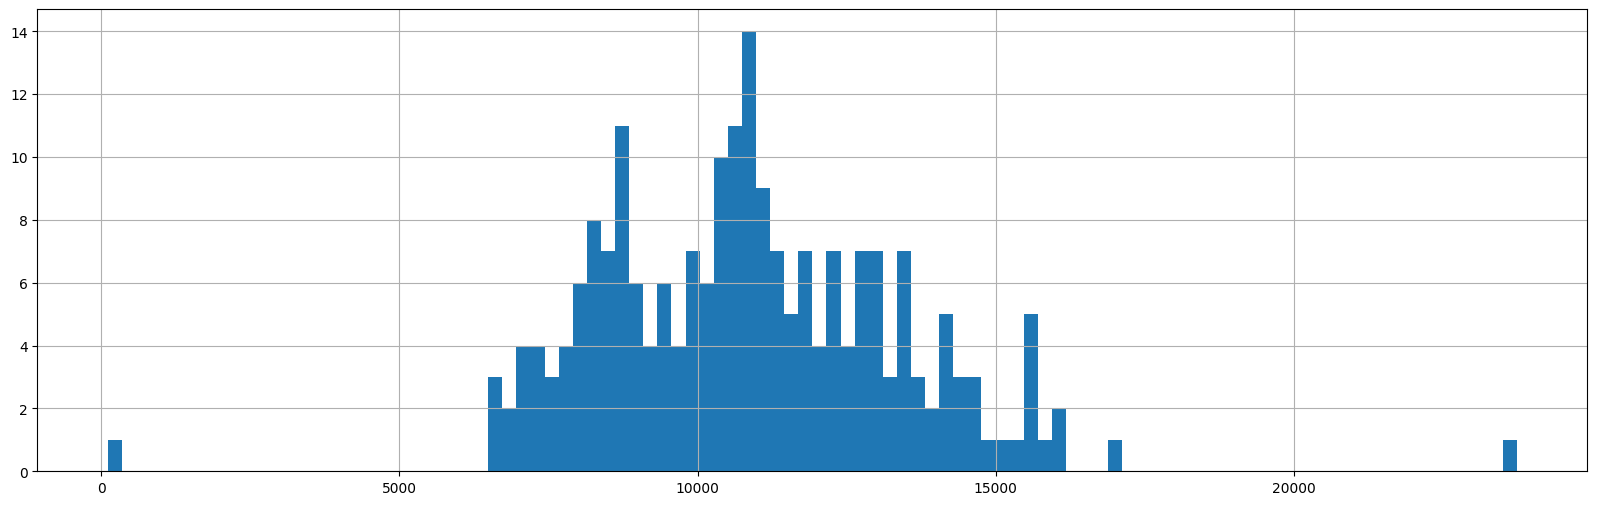

In [22]:
mobile_sales.Sales.hist(bins = 100).plot()

In [23]:
mobile_sales.Sales.quantile(0.95)

15164.599999999997

In [24]:
mobile_sales.Sales.quantile(0.05)

7307.8

<Axes: xlabel='DATE'>

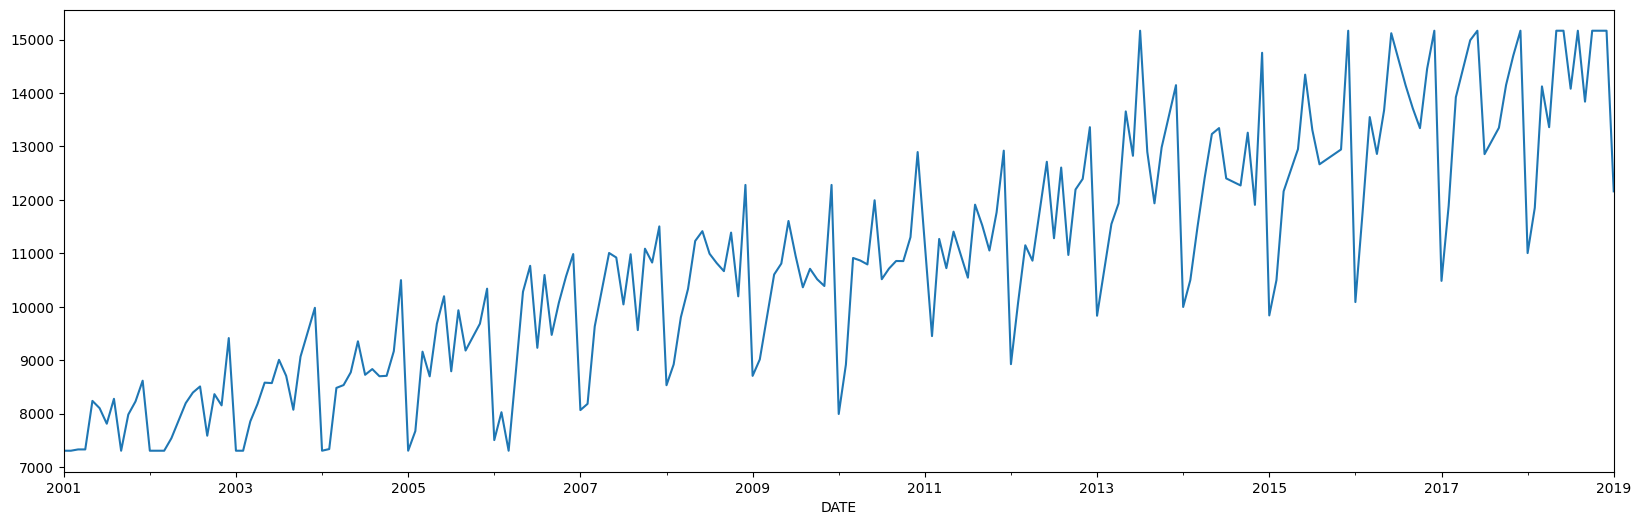

In [25]:
mobile_sales.Sales.clip(upper = mobile_sales.Sales.quantile(0.95) , lower = mobile_sales.Sales.quantile(0.05)).plot()

<Axes: xlabel='DATE'>

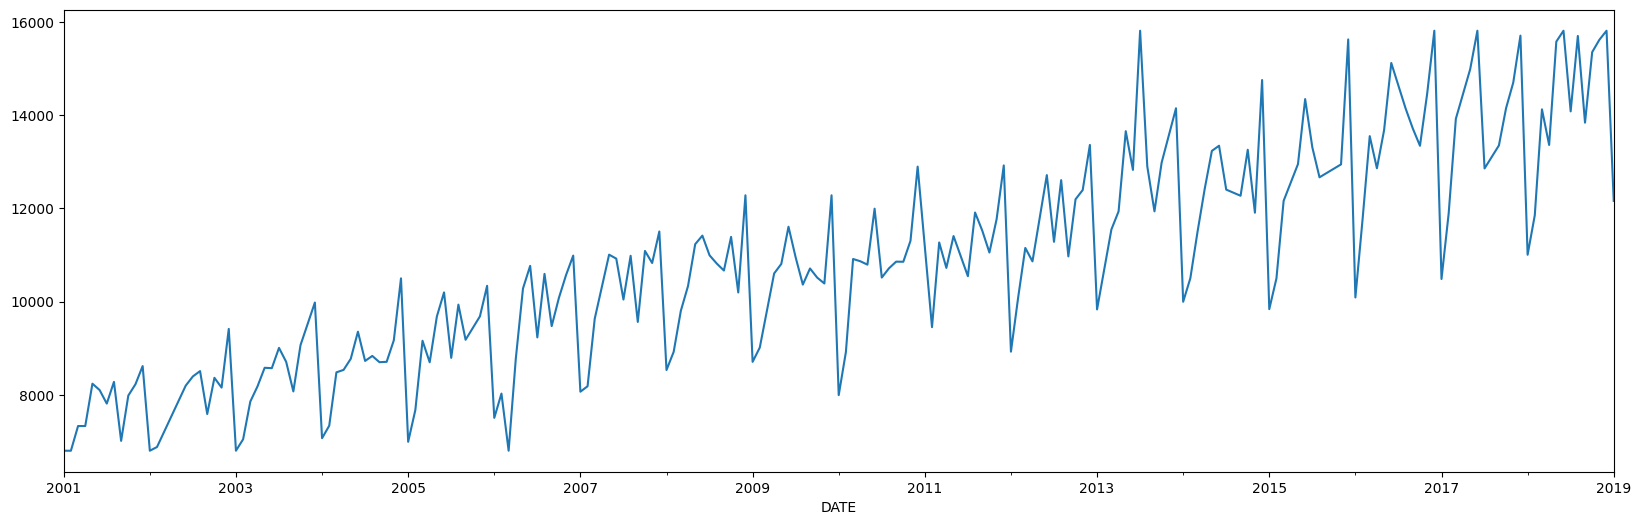

In [26]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02)).plot()

In [27]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))

[]

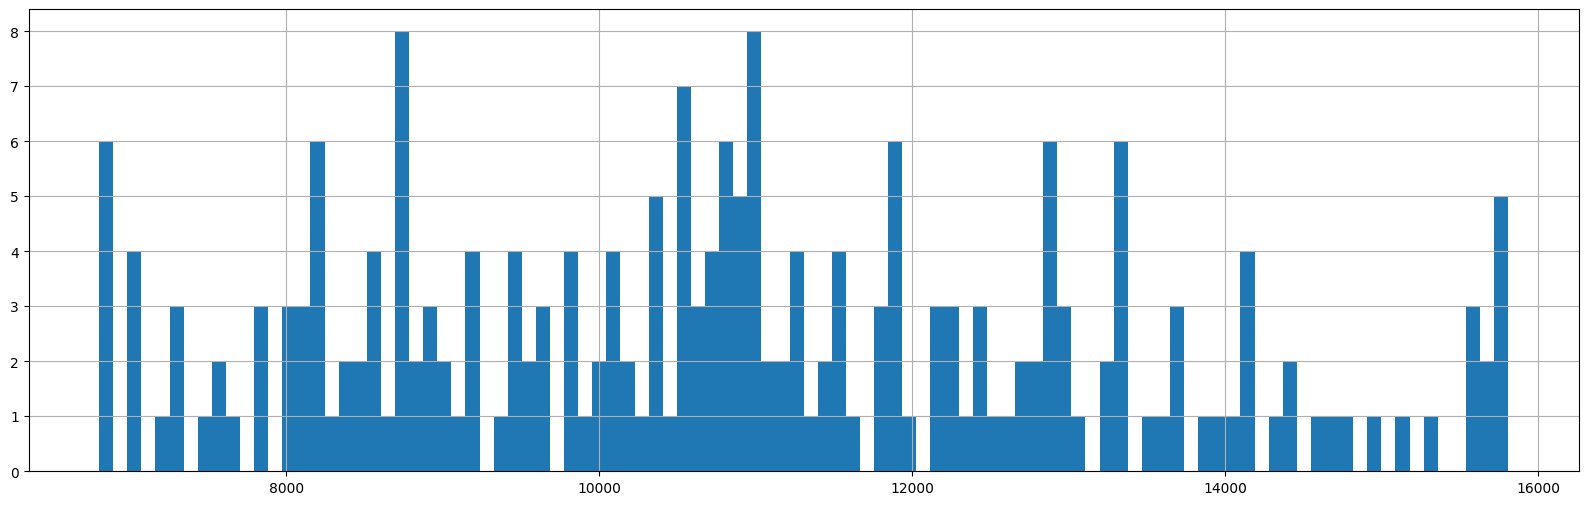

In [28]:
mobile_sales.Sales.hist(bins = 100).plot()

<Axes: xlabel='DATE'>

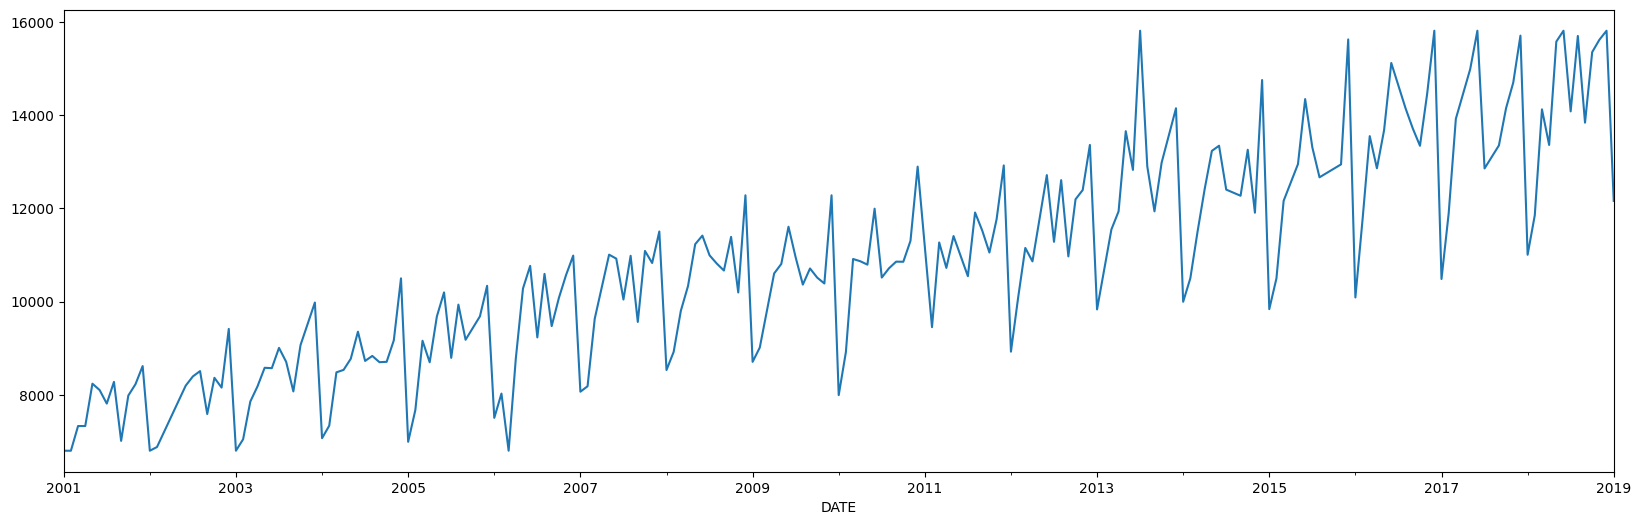

In [29]:
mobile_sales.Sales.plot()

## MOving Average

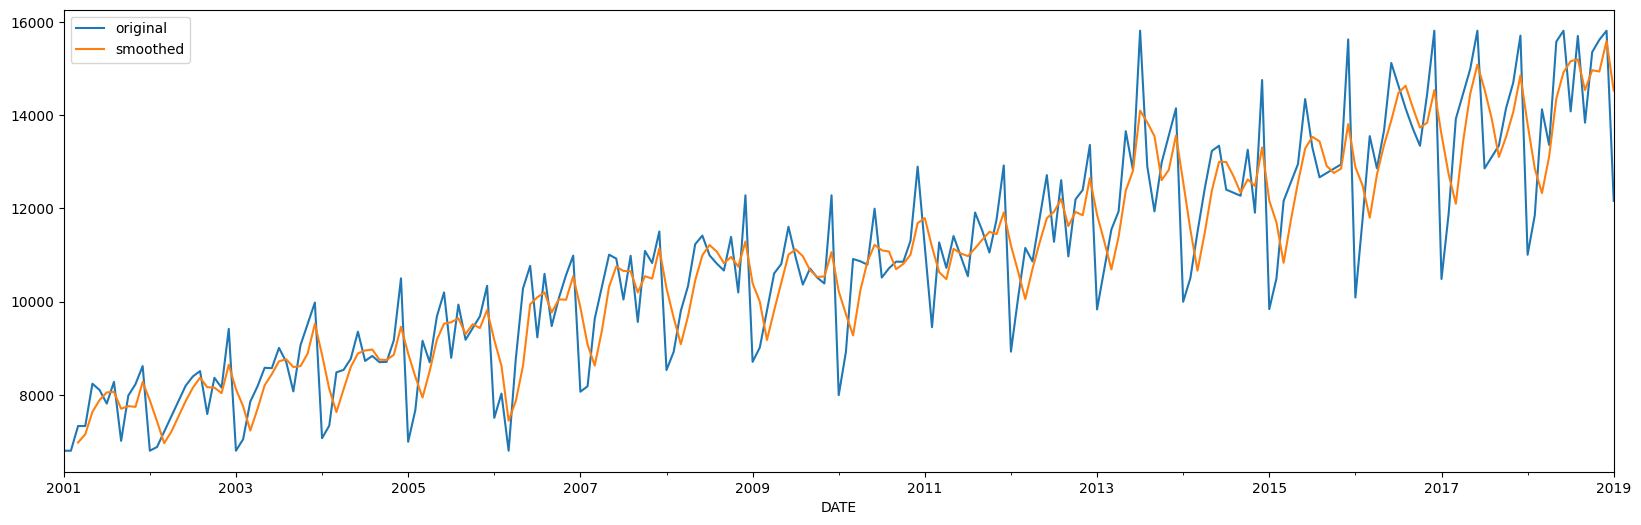

In [30]:
# Plot original data
mobile_sales.Sales.plot(label='original')


mobile_sales.Sales.rolling(3, center = False).mean().plot(label = 'smoothed')

plt.legend()

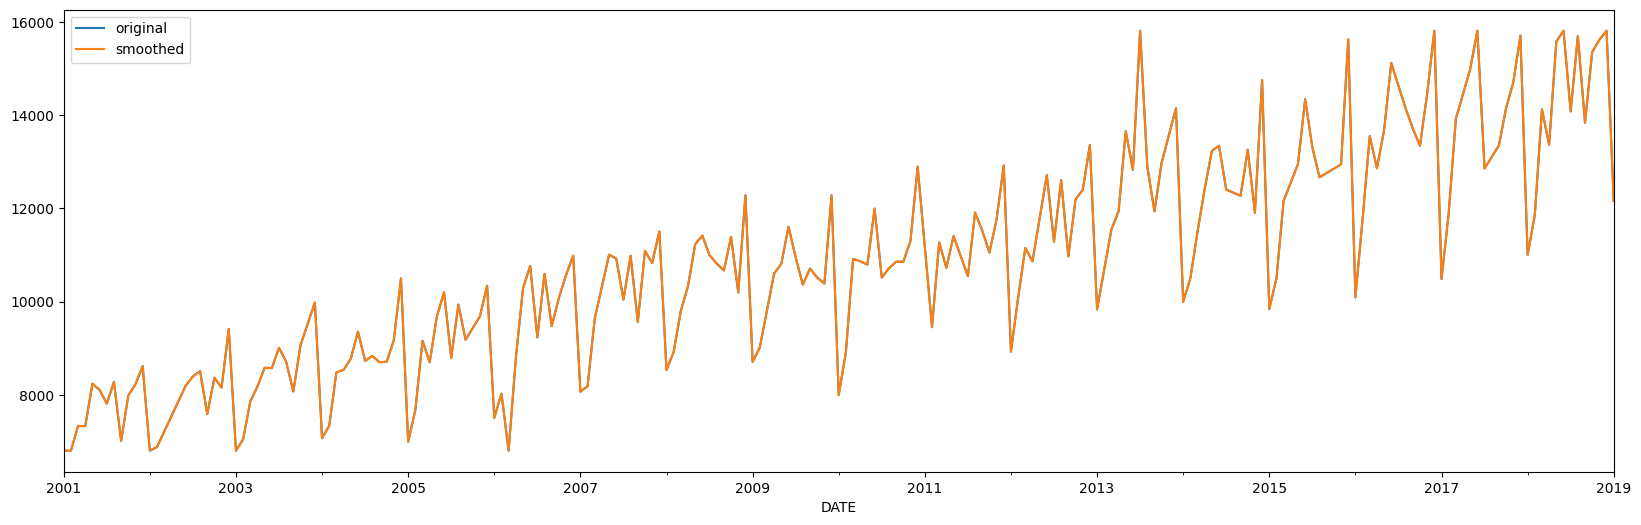

In [31]:
# Plot original data
mobile_sales.Sales.plot(label='original')


mobile_sales.Sales.rolling(1, center = False).mean().plot(label = 'smoothed')

plt.legend()

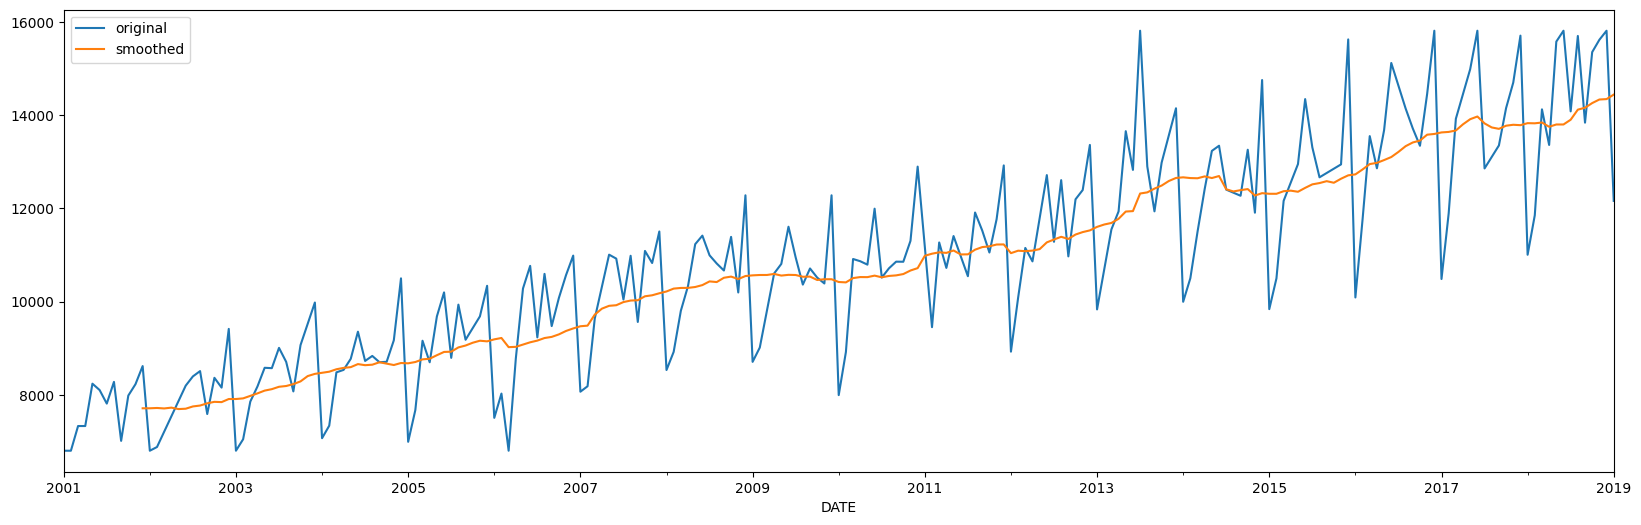

In [32]:
# Plot original data
mobile_sales.Sales.plot(label='original')


mobile_sales.Sales.rolling(12, center = False).mean().plot(label = 'smoothed')

plt.legend()

## Fitting models

In [33]:
import statsmodels.api as sm


In [34]:
model = sm.tsa.seasonal_decompose(mobile_sales['Sales'], model = 'additive')

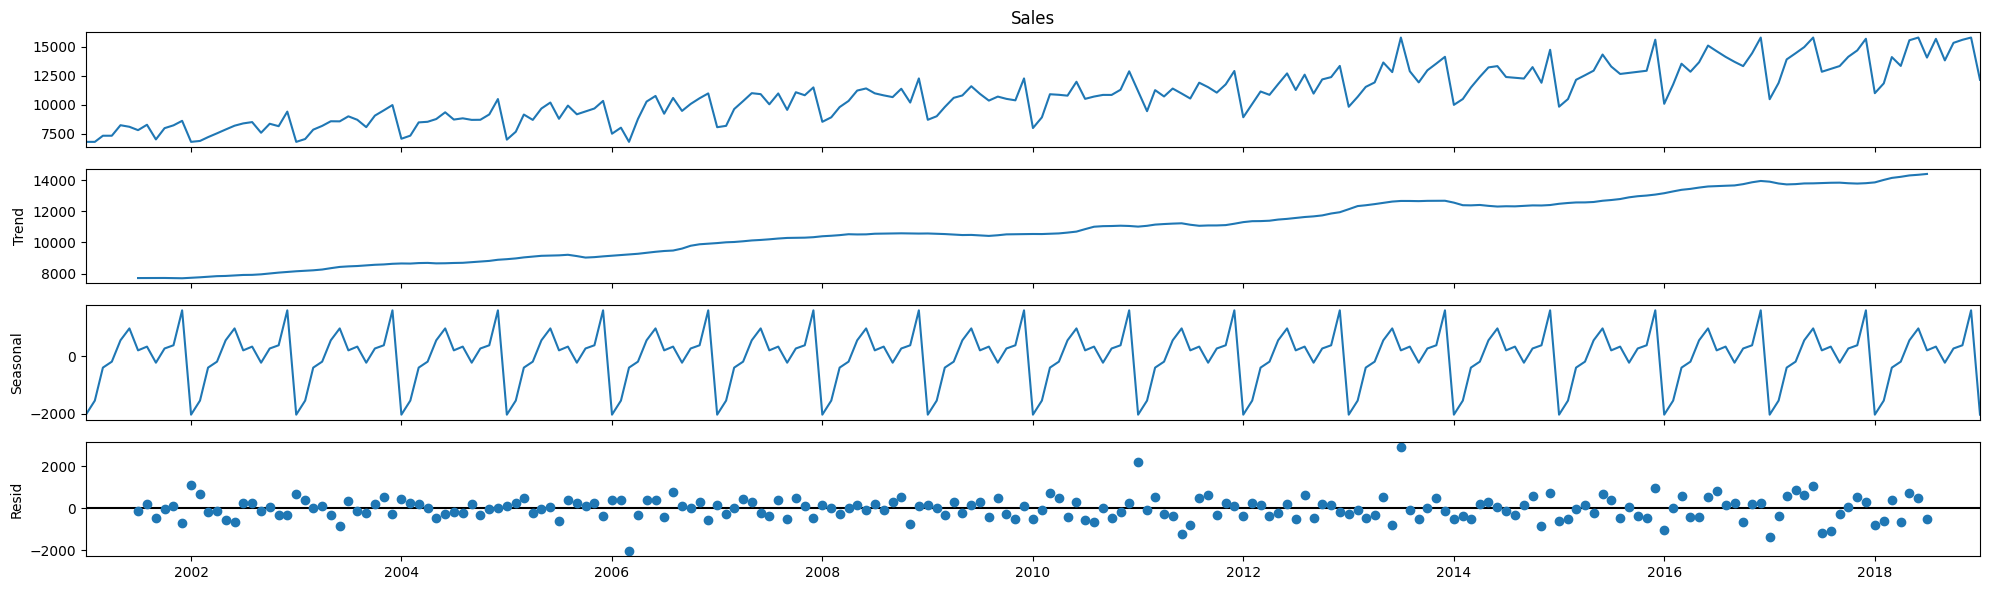

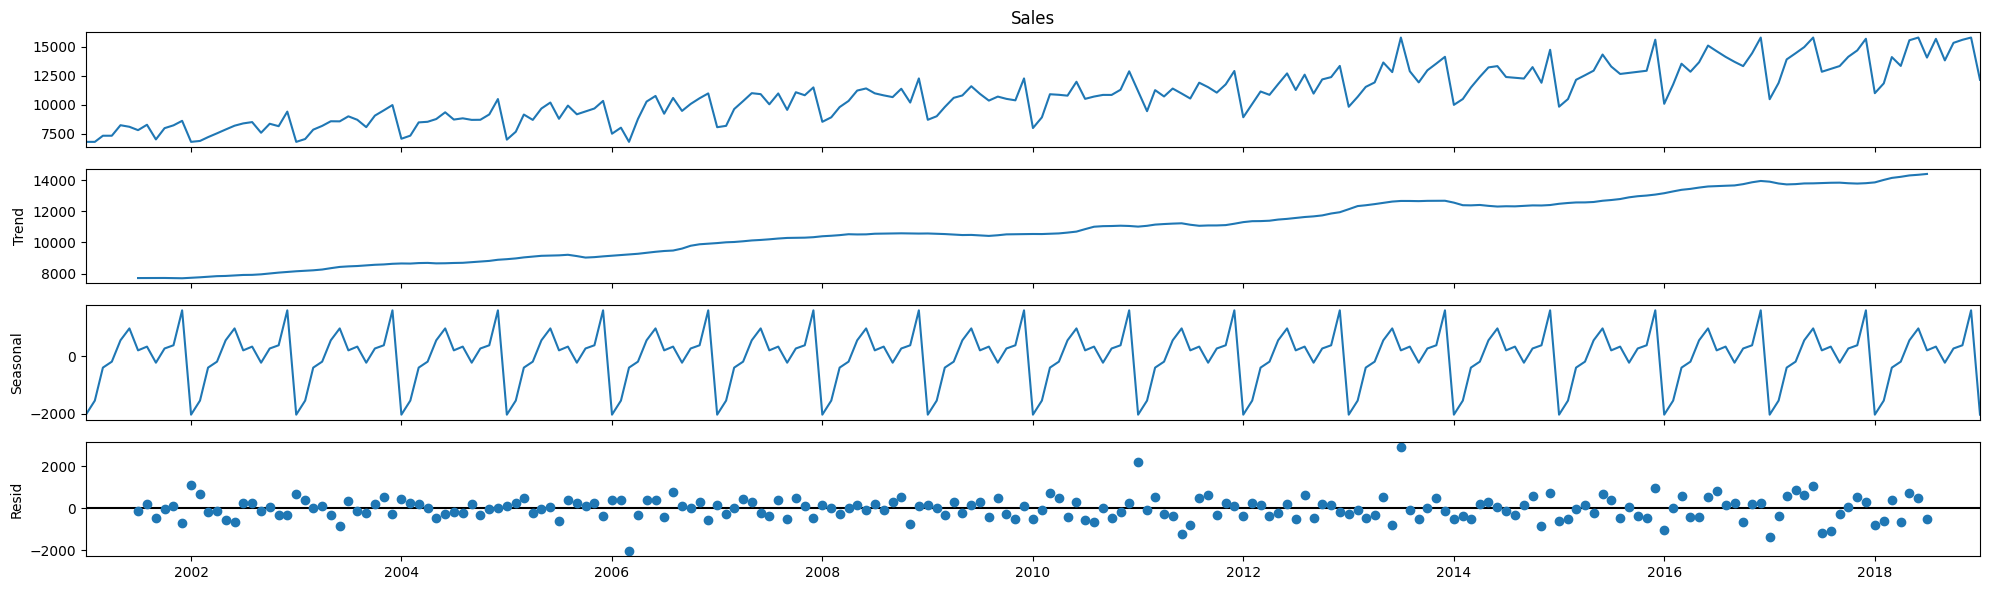

In [35]:
model.plot()

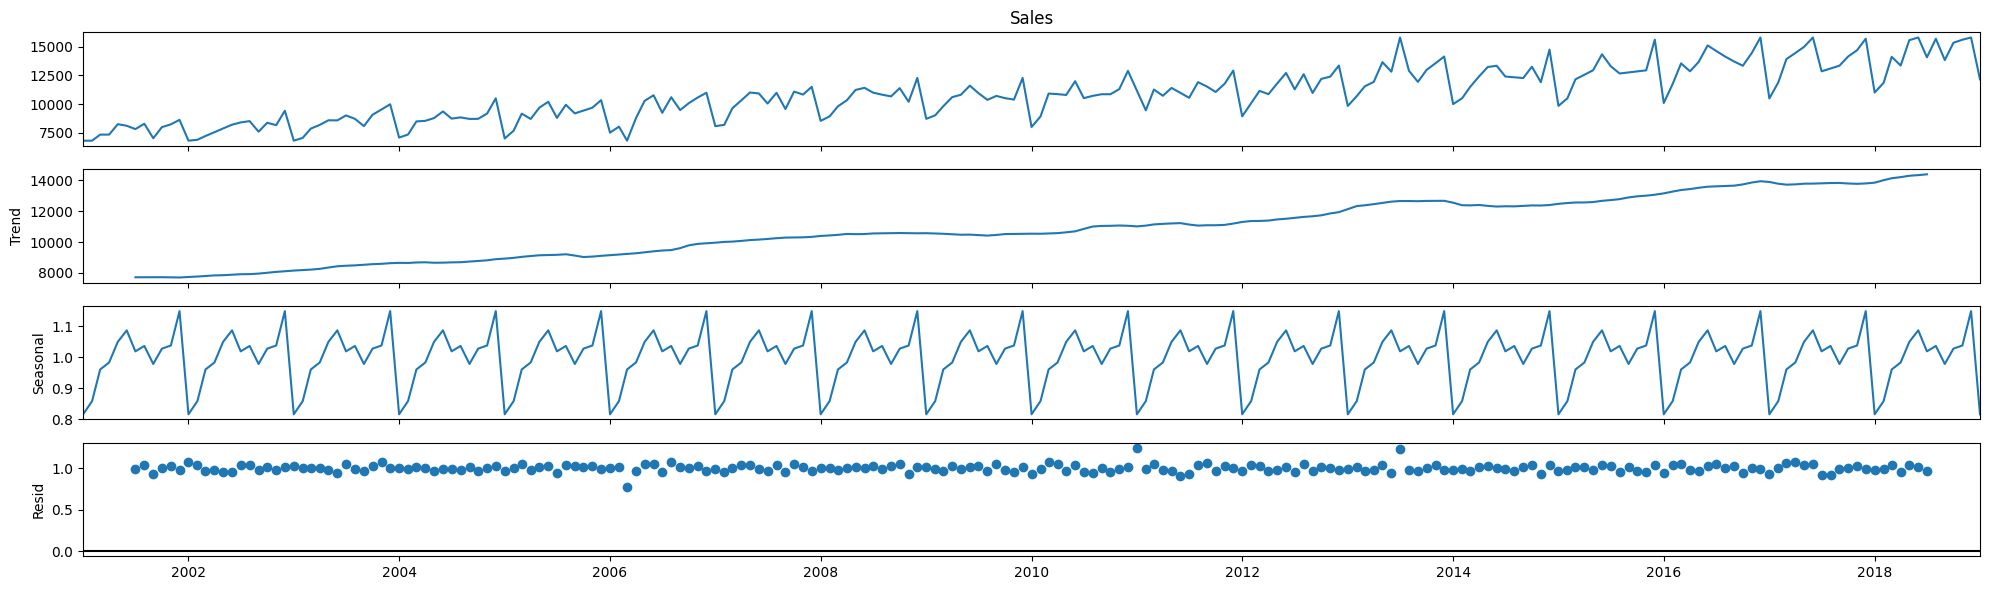

In [36]:
model_mul = sm.tsa.seasonal_decompose(mobile_sales['Sales'], model = 'multiplicative')
model_mul.plot();

<Axes: ylabel='Frequency'>

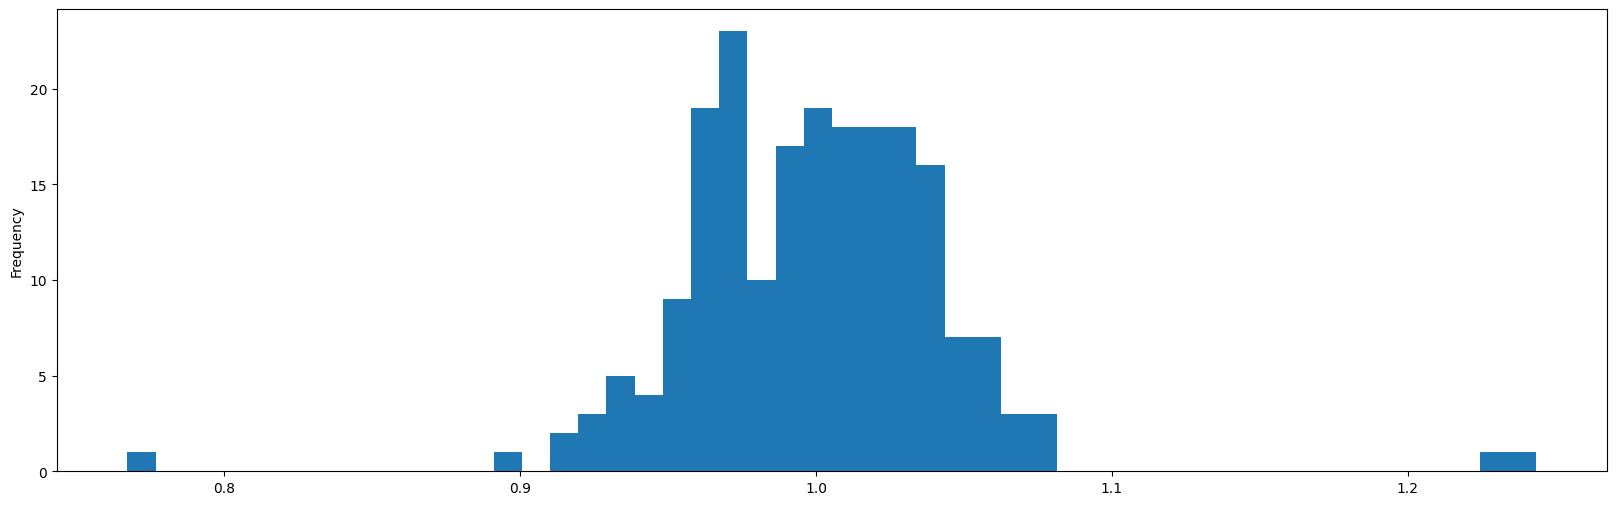

In [37]:
model_mul.resid.plot(kind = 'hist', bins = 50)

<Axes: xlabel='DATE'>

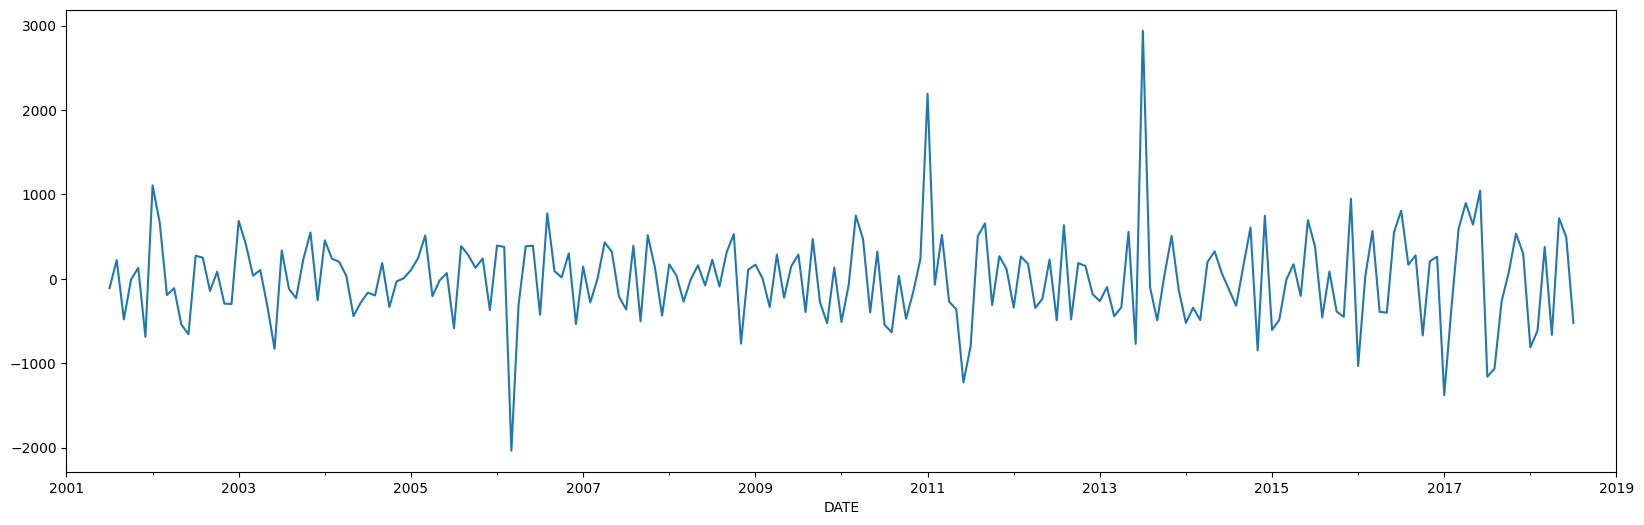

In [38]:
model.resid.plot()

<Axes: ylabel='Frequency'>

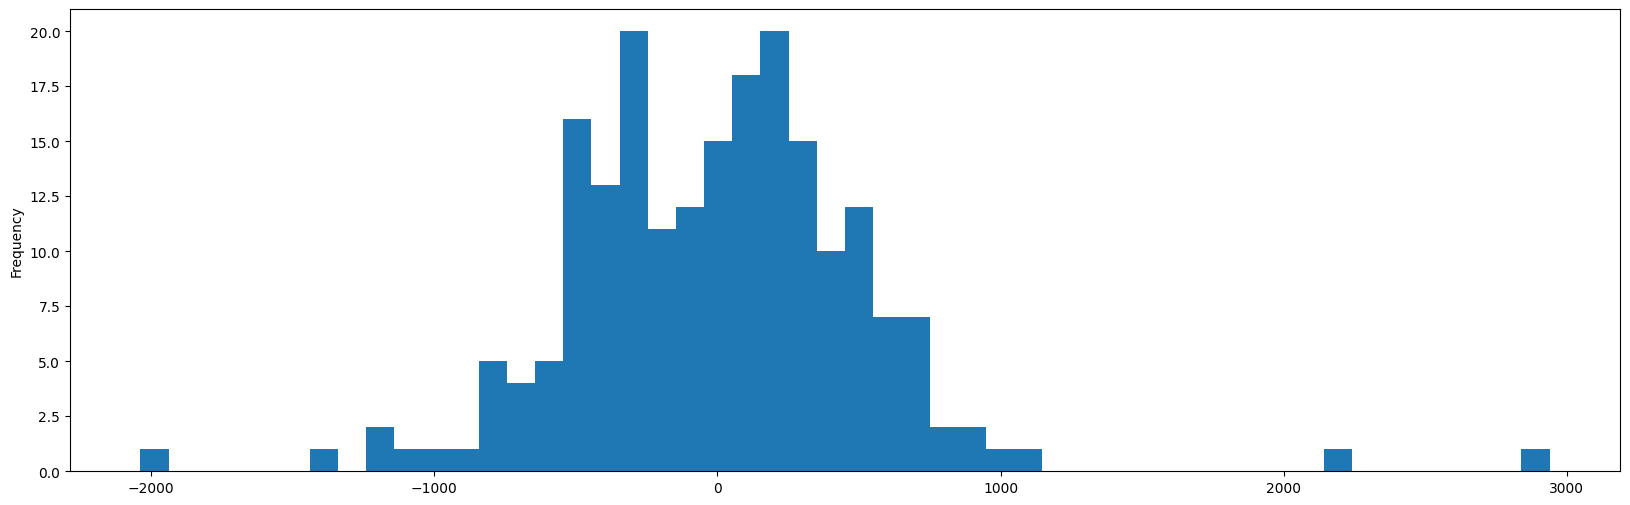

In [39]:
model.resid.plot(kind = 'hist', bins = 50)

In [40]:
model.resid.mean()

-3.2316417029771514

<Axes: xlabel='DATE'>

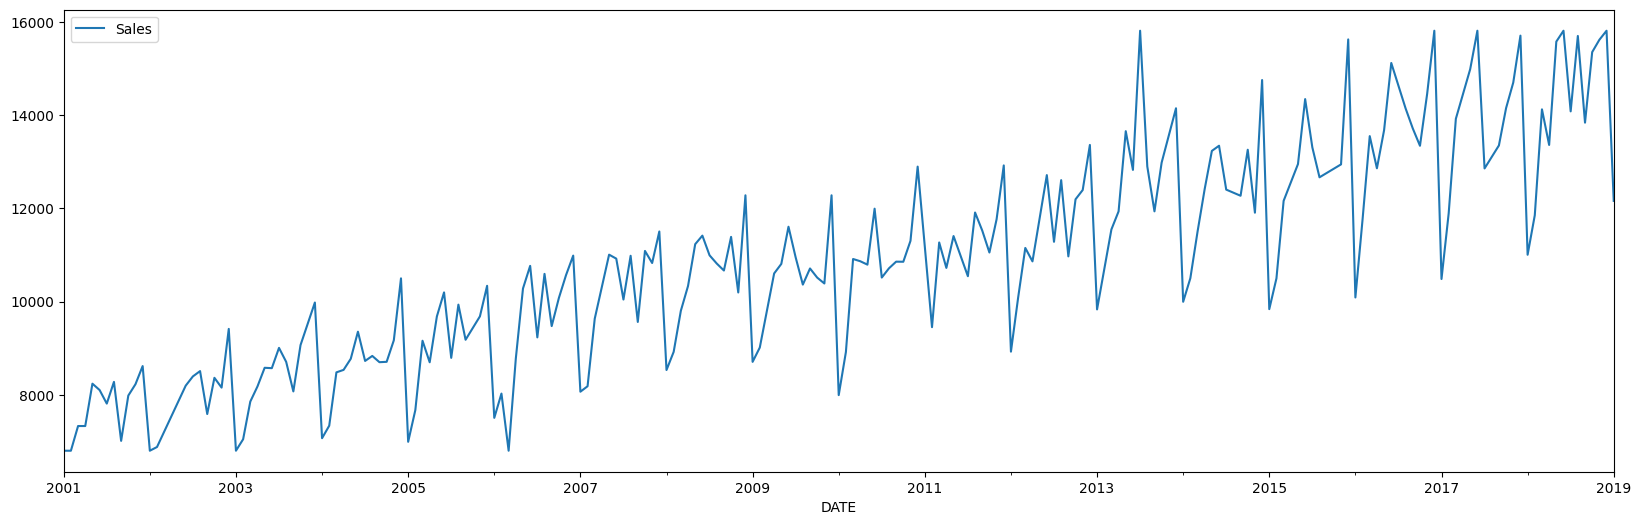

In [41]:
mobile_sales.plot()

In [42]:
model_mul.resid.mean()

0.9997150886928324

## Train Test Split

In [43]:
mobile_sales.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=217, freq=None)

In [44]:
len(mobile_sales.index)

217

In [45]:
train_max_date = mobile_sales.index[-12]
train_max_date

Timestamp('2018-02-01 00:00:00')

In [46]:
train_x =  mobile_sales.loc[mobile_sales.index < train_max_date].copy()

test_x = mobile_sales.loc[mobile_sales.index >= train_max_date].copy()

In [47]:
test_x

Sales
DATE               
2018-02-01  11852.0
2018-03-01  14123.0
2018-04-01  13360.0
2018-05-01  15576.0
2018-06-01  15809.4
2018-07-01  14080.0
2018-08-01  15697.0
2018-09-01  13838.0
2018-10-01  15351.0
2018-11-01  15615.0
2018-12-01  15809.4
2019-01-01  12160.0

In [48]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)


# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

## Global mean forecast

In [49]:
import numpy as np

df = mobile_sales.copy()

pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=12,freq='MS'))

Empty DataFrame
Columns: []
Index: [2019-01-01 00:00:00, 2019-02-01 00:00:00, 2019-03-01 00:00:00, 2019-04-01 00:00:00, 2019-05-01 00:00:00, 2019-06-01 00:00:00, 2019-07-01 00:00:00, 2019-08-01 00:00:00, 2019-09-01 00:00:00, 2019-10-01 00:00:00, 2019-11-01 00:00:00, 2019-12-01 00:00:00]

In [50]:
new_dates = pd.date_range(start=df.index[-1], periods=13, freq='MS')[1:]
df = pd.concat([df, pd.DataFrame(index=new_dates)])

In [51]:
df

Sales
2001-01-01  6802.44
2001-02-01  6802.44
2001-03-01  7332.00
2001-04-01  7332.00
2001-05-01  8240.00
...             ...
2019-09-01      NaN
2019-10-01      NaN
2019-11-01      NaN
2019-12-01      NaN
2020-01-01      NaN

[229 rows x 1 columns]

In [52]:
train_x['Sales'].mean()

10653.201951219511

In [53]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

test_x

Sales
DATE               
2018-02-01  11852.0
2018-03-01  14123.0
2018-04-01  13360.0
2018-05-01  15576.0
2018-06-01  15809.4
2018-07-01  14080.0
2018-08-01  15697.0
2018-09-01  13838.0
2018-10-01  15351.0
2018-11-01  15615.0
2018-12-01  15809.4
2019-01-01  12160.0

In [54]:
train_x['Sales'].mean()

10653.201951219511

In [55]:
test_x['pred'] = train_x['Sales'].mean()

In [56]:
test_x

Sales          pred
DATE                             
2018-02-01  11852.0  10653.201951
2018-03-01  14123.0  10653.201951
2018-04-01  13360.0  10653.201951
2018-05-01  15576.0  10653.201951
2018-06-01  15809.4  10653.201951
2018-07-01  14080.0  10653.201951
2018-08-01  15697.0  10653.201951
2018-09-01  13838.0  10653.201951
2018-10-01  15351.0  10653.201951
2018-11-01  15615.0  10653.201951
2018-12-01  15809.4  10653.201951
2019-01-01  12160.0  10653.201951

In [57]:
performance(test_x['Sales'], test_x['pred'])

MAE : 3786.031
RMSE : 4025.906
MAPE: 0.255


<Axes: xlabel='DATE'>

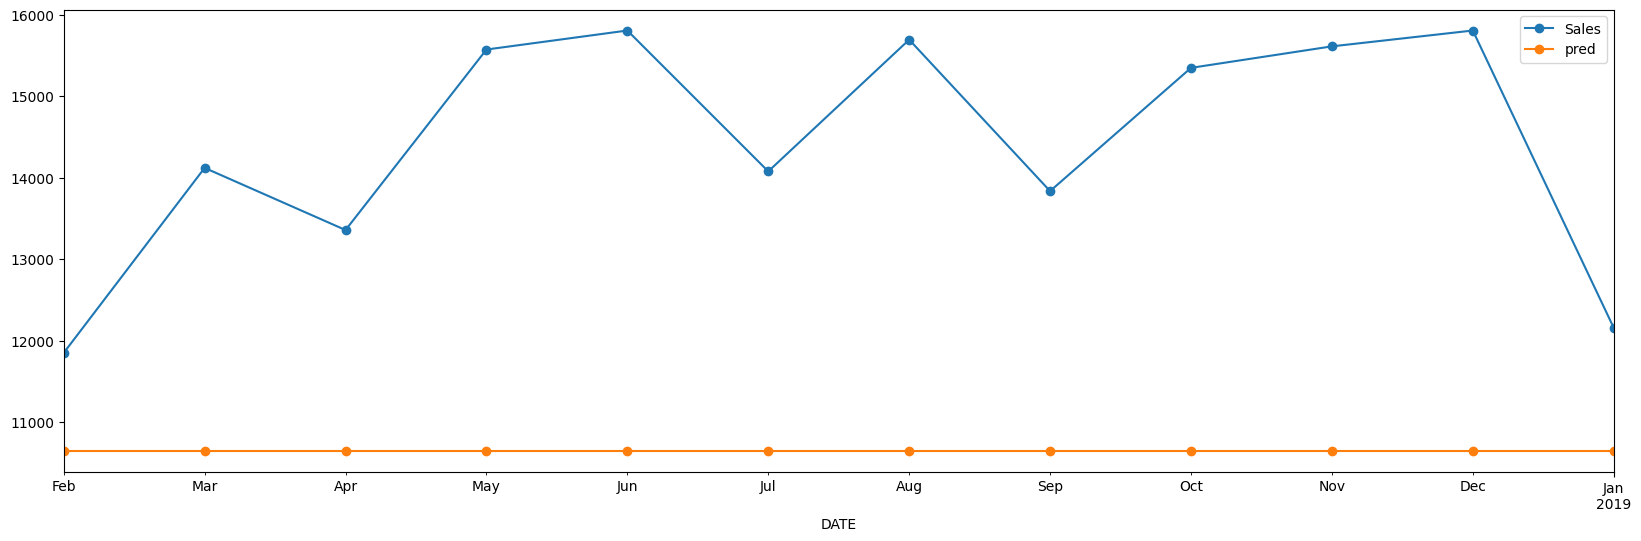

In [58]:
test_x.plot(style='-o')

## Naive Model

In [59]:
test_x['pred']  = train_x['Sales'][-1]

/tmp/ipykernel_786/2083425752.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred']  = train_x['Sales'][-1]


In [60]:
performance(test_x['Sales'], test_x['pred'])

MAE : 3434.233
RMSE : 3697.005
MAPE: 0.23


<Axes: xlabel='DATE'>

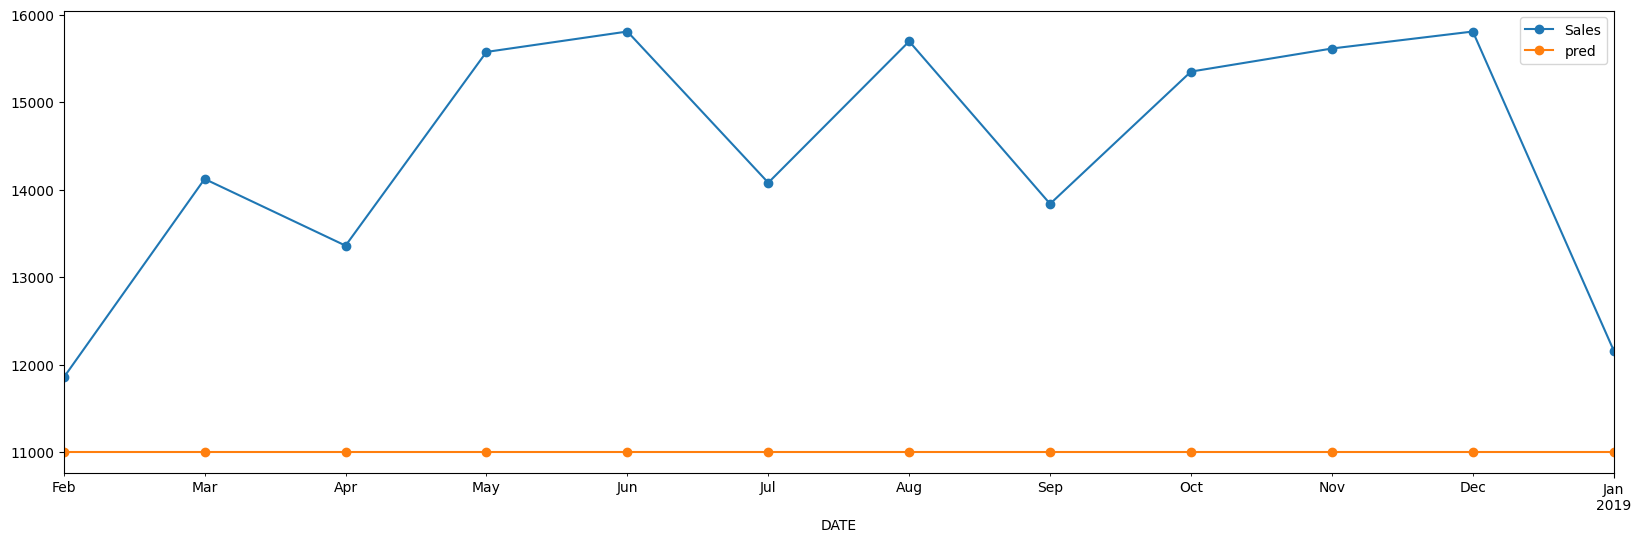

In [61]:
test_x.plot(style='-o')

## Seasonal Naive

In [62]:
test_x

Sales     pred
DATE                        
2018-02-01  11852.0  11005.0
2018-03-01  14123.0  11005.0
2018-04-01  13360.0  11005.0
2018-05-01  15576.0  11005.0
2018-06-01  15809.4  11005.0
2018-07-01  14080.0  11005.0
2018-08-01  15697.0  11005.0
2018-09-01  13838.0  11005.0
2018-10-01  15351.0  11005.0
2018-11-01  15615.0  11005.0
2018-12-01  15809.4  11005.0
2019-01-01  12160.0  11005.0

In [63]:
for date in test_x.index:
  test_x.loc[date ,'pred'] = train_x.loc[date - pd.DateOffset(years=1), 'Sales']

In [64]:
test_x

Sales     pred
DATE                        
2018-02-01  11852.0  11891.0
2018-03-01  14123.0  13921.0
2018-04-01  13360.0  14453.5
2018-05-01  15576.0  14986.0
2018-06-01  15809.4  15809.4
2018-07-01  14080.0  12856.0
2018-08-01  15697.0  13102.5
2018-09-01  13838.0  13349.0
2018-10-01  15351.0  14150.0
2018-11-01  15615.0  14698.0
2018-12-01  15809.4  15704.0
2019-01-01  12160.0  11005.0

<Axes: xlabel='DATE'>

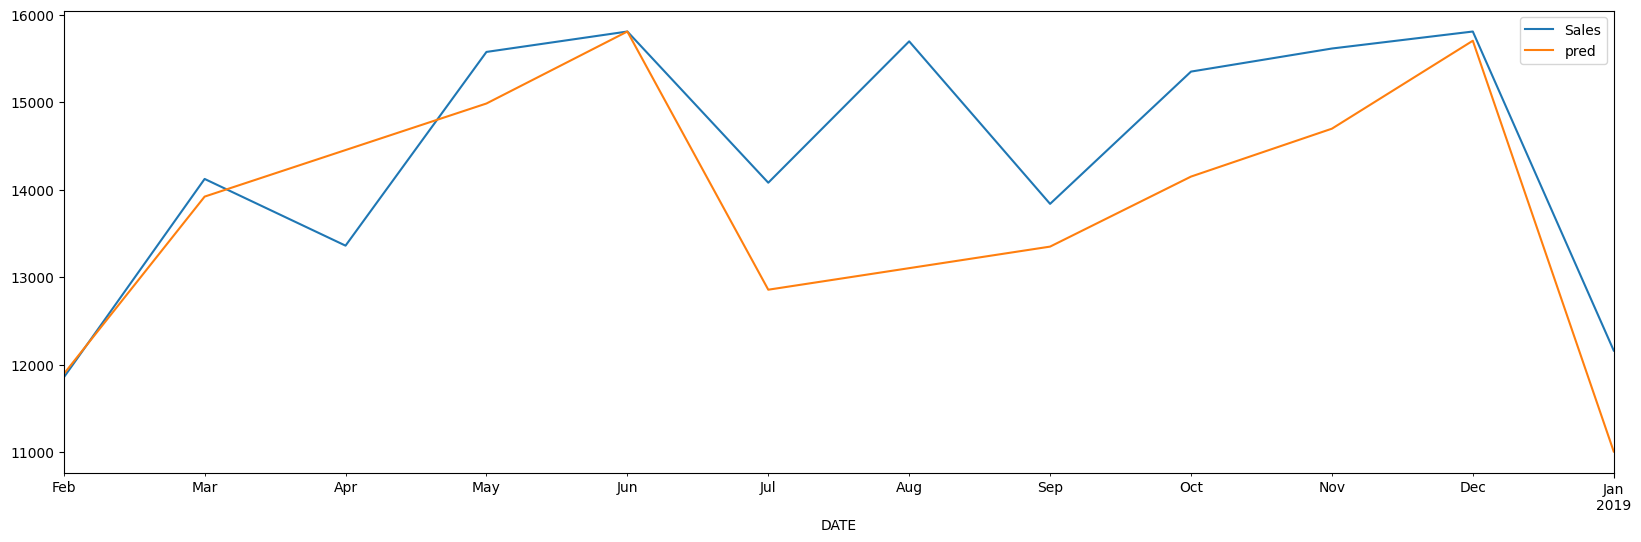

In [65]:
test_x.plot()

In [66]:
performance(test_x['Sales'], test_x['pred'])

MAE : 800.867
RMSE : 1067.837
MAPE: 0.055


## Drift

In [67]:
# Get the slope
y_t = train_x['Sales'].iloc[-1]
y_0 = train_x['Sales'].iloc[0]
m = (y_t - y_0) / len(train_x)
m

20.50029268292683

In [68]:
h = np.linspace(0,len(test_x)-1, len(test_x))
h

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [69]:
test_x['pred'] = y_t + m * h

In [70]:
test_x

Sales          pred
DATE                             
2018-02-01  11852.0  11005.000000
2018-03-01  14123.0  11025.500293
2018-04-01  13360.0  11046.000585
2018-05-01  15576.0  11066.500878
2018-06-01  15809.4  11087.001171
2018-07-01  14080.0  11107.501463
2018-08-01  15697.0  11128.001756
2018-09-01  13838.0  11148.502049
2018-10-01  15351.0  11169.002341
2018-11-01  15615.0  11189.502634
2018-12-01  15809.4  11210.002927
2019-01-01  12160.0  11230.503220

MAE : 3321.482
RMSE : 3586.323
MAPE: 0.223


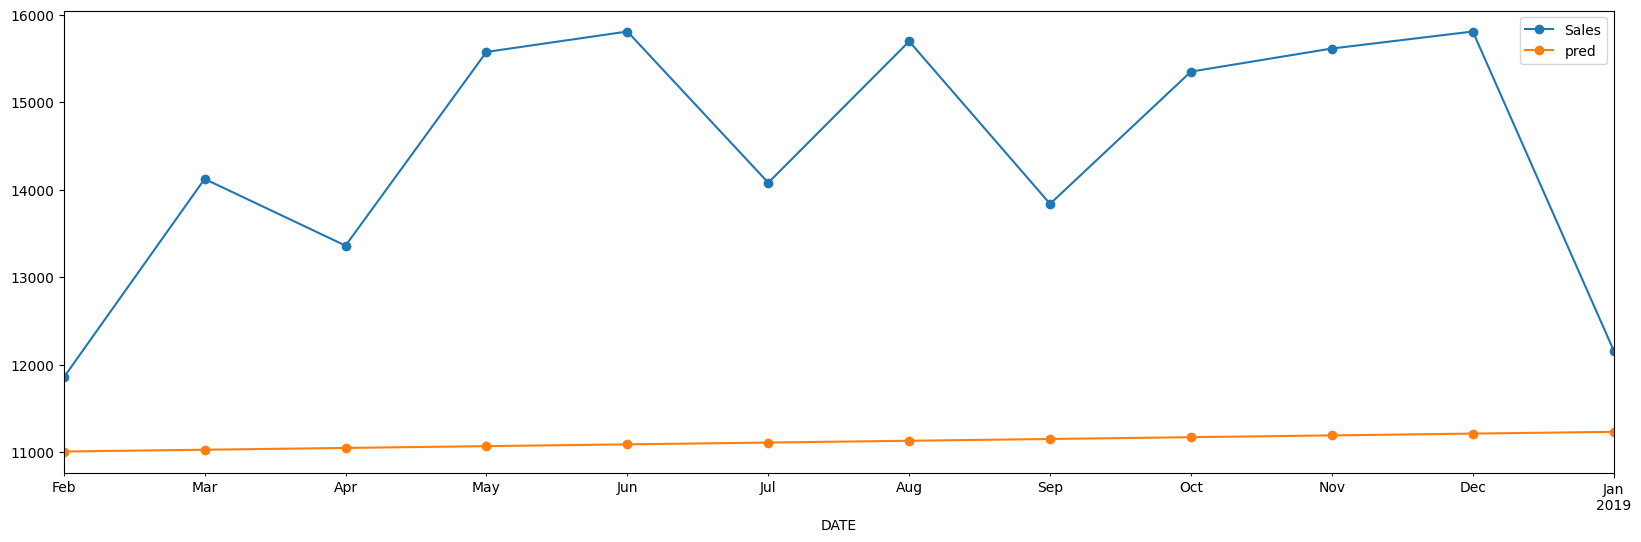

In [71]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

## Implementing Moving AVerage method

In [72]:
import numpy as np

df = mobile_sales.copy()

In [73]:
df

Sales
DATE                
2001-01-01   6802.44
2001-02-01   6802.44
2001-03-01   7332.00
2001-04-01   7332.00
2001-05-01   8240.00
...              ...
2018-09-01  13838.00
2018-10-01  15351.00
2018-11-01  15615.00
2018-12-01  15809.40
2019-01-01  12160.00

[217 rows x 1 columns]

In [74]:
new_dates = pd.date_range(start=df.index[-1], periods=13, freq='MS')[1:]
df = pd.concat([df, pd.DataFrame(index=new_dates)])


In [75]:
new_dates

DatetimeIndex(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [76]:
df

Sales
2001-01-01  6802.44
2001-02-01  6802.44
2001-03-01  7332.00
2001-04-01  7332.00
2001-05-01  8240.00
...             ...
2019-09-01      NaN
2019-10-01      NaN
2019-11-01      NaN
2019-12-01      NaN
2020-01-01      NaN

[229 rows x 1 columns]

In [77]:
print(df.tail(20))

              Sales
2018-06-01  15809.4
2018-07-01  14080.0
2018-08-01  15697.0
2018-09-01  13838.0
2018-10-01  15351.0
2018-11-01  15615.0
2018-12-01  15809.4
2019-01-01  12160.0
2019-02-01      NaN
2019-03-01      NaN
2019-04-01      NaN
2019-05-01      NaN
2019-06-01      NaN
2019-07-01      NaN
2019-08-01      NaN
2019-09-01      NaN
2019-10-01      NaN
2019-11-01      NaN
2019-12-01      NaN
2020-01-01      NaN


In [78]:
pred = df.Sales.dropna().values

In [79]:
pred[-4:]

array([15351. , 15615. , 15809.4, 12160. ])

In [80]:
pred[-3:].mean()

14528.133333333333

In [81]:
pred

array([ 6802.44      ,  6802.44      ,  7332.        ,  7332.        ,
        8240.        ,  8104.        ,  7813.        ,  8279.        ,
        7014.        ,  7985.        ,  8229.        ,  8618.        ,
        6802.44      ,  6882.        ,  7211.        ,  7540.        ,
        7869.        ,  8198.        ,  8396.        ,  8510.        ,
        7589.        ,  8366.        ,  8156.        ,  9415.        ,
        6802.44      ,  7048.        ,  7856.        ,  8181.        ,
        8581.        ,  8573.        ,  9008.        ,  8708.        ,
        8074.        ,  9068.        ,  9524.5       ,  9981.        ,
        7071.        ,  7339.        ,  8483.        ,  8536.        ,
        8774.        ,  9355.        ,  8728.        ,  8835.        ,
        8701.        ,  8709.        ,  9170.        , 10499.        ,
        6994.        ,  7675.        ,  9161.        ,  8699.        ,
        9682.        , 10198.        ,  8794.        ,  9935.        ,
      

In [82]:
np.append(pred, pred[-3:].mean())

array([ 6802.44      ,  6802.44      ,  7332.        ,  7332.        ,
        8240.        ,  8104.        ,  7813.        ,  8279.        ,
        7014.        ,  7985.        ,  8229.        ,  8618.        ,
        6802.44      ,  6882.        ,  7211.        ,  7540.        ,
        7869.        ,  8198.        ,  8396.        ,  8510.        ,
        7589.        ,  8366.        ,  8156.        ,  9415.        ,
        6802.44      ,  7048.        ,  7856.        ,  8181.        ,
        8581.        ,  8573.        ,  9008.        ,  8708.        ,
        8074.        ,  9068.        ,  9524.5       ,  9981.        ,
        7071.        ,  7339.        ,  8483.        ,  8536.        ,
        8774.        ,  9355.        ,  8728.        ,  8835.        ,
        8701.        ,  8709.        ,  9170.        , 10499.        ,
        6994.        ,  7675.        ,  9161.        ,  8699.        ,
        9682.        , 10198.        ,  8794.        ,  9935.        ,
      

In [83]:
for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

In [84]:
pred[-14:]

array([15809.4       , 12160.        , 14528.13333333, 14165.84444444,
       13617.99259259, 14103.99012346, 13962.6090535 , 13894.86392318,
       13987.15436671, 13948.20911446, 13943.40913479, 13959.59087199,
       13950.40304041, 13951.13434906])

In [85]:
pred = pred.round(1)


In [86]:
pred

array([ 6802.4,  6802.4,  7332. ,  7332. ,  8240. ,  8104. ,  7813. ,
        8279. ,  7014. ,  7985. ,  8229. ,  8618. ,  6802.4,  6882. ,
        7211. ,  7540. ,  7869. ,  8198. ,  8396. ,  8510. ,  7589. ,
        8366. ,  8156. ,  9415. ,  6802.4,  7048. ,  7856. ,  8181. ,
        8581. ,  8573. ,  9008. ,  8708. ,  8074. ,  9068. ,  9524.5,
        9981. ,  7071. ,  7339. ,  8483. ,  8536. ,  8774. ,  9355. ,
        8728. ,  8835. ,  8701. ,  8709. ,  9170. , 10499. ,  6994. ,
        7675. ,  9161. ,  8699. ,  9682. , 10198. ,  8794. ,  9935. ,
        9182. ,  9433. ,  9684. , 10339. ,  7507. ,  8028. ,  6802.4,
        8777. , 10281. , 10767. ,  9233. , 10595. ,  9475. , 10077. ,
       10569. , 10987. ,  8068. ,  8185. ,  9634. , 10320.5, 11007. ,
       10922. , 10045. , 10983. ,  9564. , 11087. , 10828. , 11504. ,
        8533. ,  8923. ,  9804. , 10335. , 11232. , 11415. , 10993. ,
       10817. , 10667. , 11388. , 10196. , 12280. ,  8708. ,  9015. ,
        9809.5, 1060

In [87]:
df['pred'] = pred

In [88]:
df

Sales     pred
2001-01-01  6802.44   6802.4
2001-02-01  6802.44   6802.4
2001-03-01  7332.00   7332.0
2001-04-01  7332.00   7332.0
2001-05-01  8240.00   8240.0
...             ...      ...
2019-09-01      NaN  13948.2
2019-10-01      NaN  13943.4
2019-11-01      NaN  13959.6
2019-12-01      NaN  13950.4
2020-01-01      NaN  13951.1

[229 rows x 2 columns]

In [89]:
df.loc[~df['Sales'].isna(), 'Pred'] = np.nan


<Axes: >

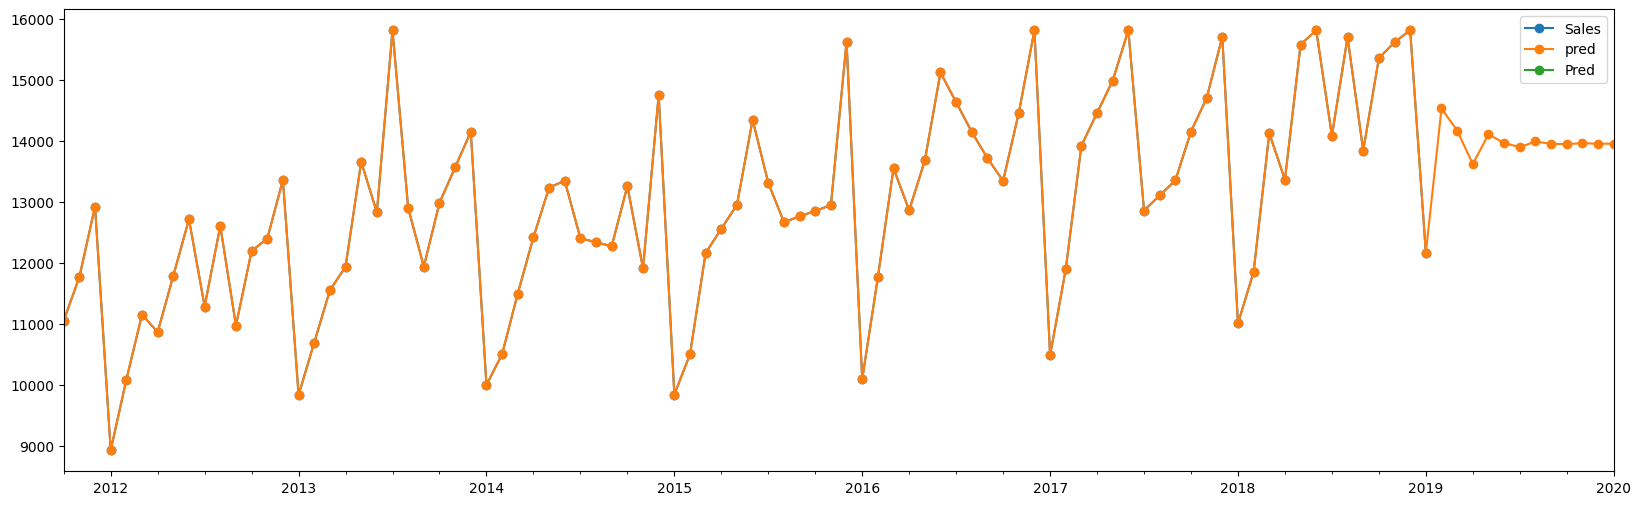

In [90]:
df.tail(100).plot(style = '-o')

In [91]:
df = train_x.copy()


In [92]:
new_dates = pd.date_range(start=df.index[-1], periods=12, freq='MS')[1:]
new_df = pd.DataFrame(index=new_dates)
df = pd.concat([df, new_df])

In [93]:
df

Sales
2001-01-01  6802.44
2001-02-01  6802.44
2001-03-01  7332.00
2001-04-01  7332.00
2001-05-01  8240.00
...             ...
2018-08-01      NaN
2018-09-01      NaN
2018-10-01      NaN
2018-11-01      NaN
2018-12-01      NaN

[216 rows x 1 columns]

In [94]:
pred = df.Sales.dropna().values

for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

In [95]:

test_x['pred'] = pred[-12:]
test_x

Sales          pred
DATE                             
2018-02-01  11852.0  13802.333333
2018-03-01  14123.0  13503.777778
2018-04-01  13360.0  12770.370370
2018-05-01  15576.0  13358.827160
2018-06-01  15809.4  13210.991770
2018-07-01  14080.0  13113.396433
2018-08-01  15697.0  13227.738455
2018-09-01  13838.0  13184.042219
2018-10-01  15351.0  13175.059036
2018-11-01  15615.0  13195.613236
2018-12-01  15809.4  13184.904830
2019-01-01  12160.0  13185.192368

<Axes: xlabel='DATE'>

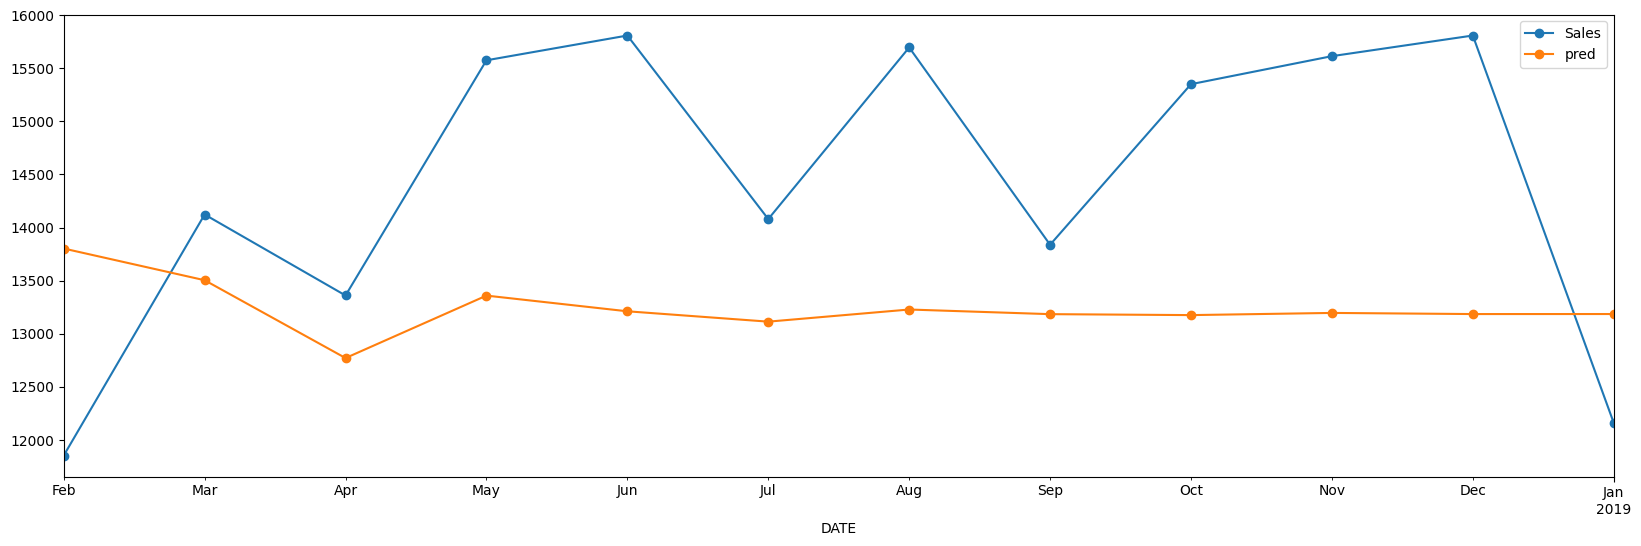

In [96]:
test_x.plot(style='-o')

In [97]:
performance(test_x['Sales'], test_x['pred'])


MAE : 1692.467
RMSE : 1875.03
MAPE: 0.115


## Simple Exponential Smoothing

In [98]:
model = pd.Series(sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=1/(2*12) ).fittedvalues)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


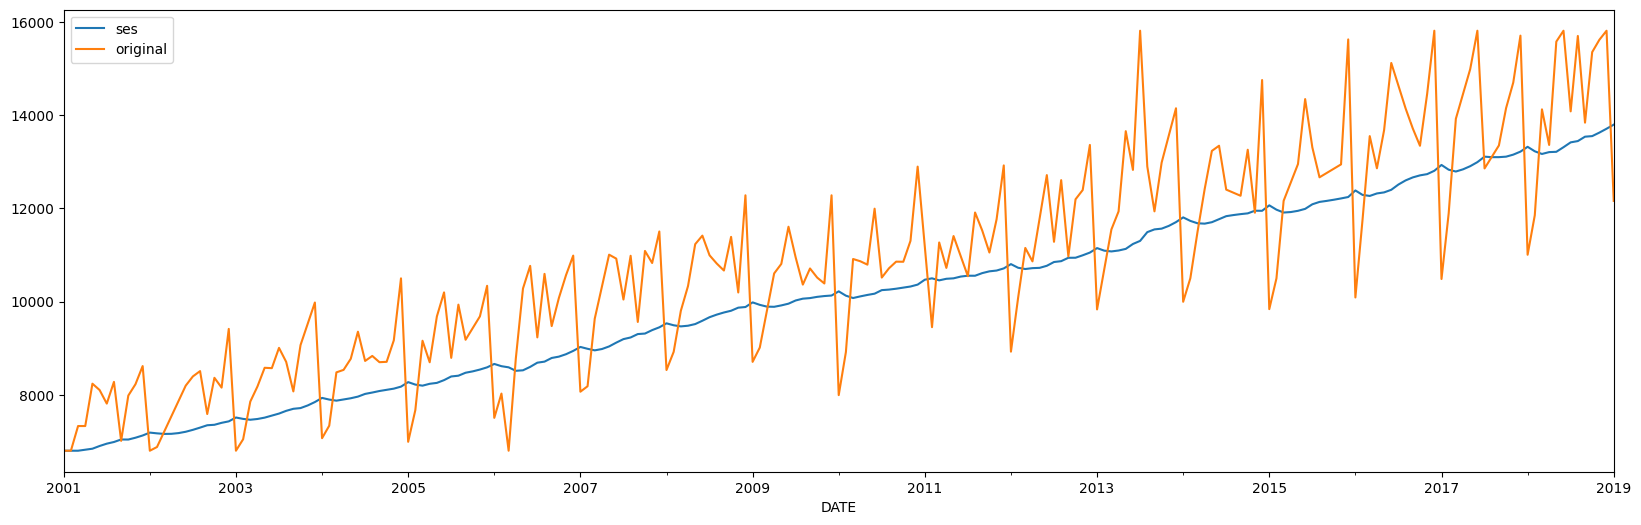

In [99]:
model.plot(label = 'ses')
mobile_sales.Sales.plot(label='original')
plt.legend()

In [100]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=1/(2*12))

pred = model.forecast(steps = 12)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [101]:
pred

2019-02-01    13726.902325
2019-03-01    13726.902325
2019-04-01    13726.902325
2019-05-01    13726.902325
2019-06-01    13726.902325
2019-07-01    13726.902325
2019-08-01    13726.902325
2019-09-01    13726.902325
2019-10-01    13726.902325
2019-11-01    13726.902325
2019-12-01    13726.902325
2020-01-01    13726.902325
Freq: MS, dtype: float64

<Axes: xlabel='DATE'>

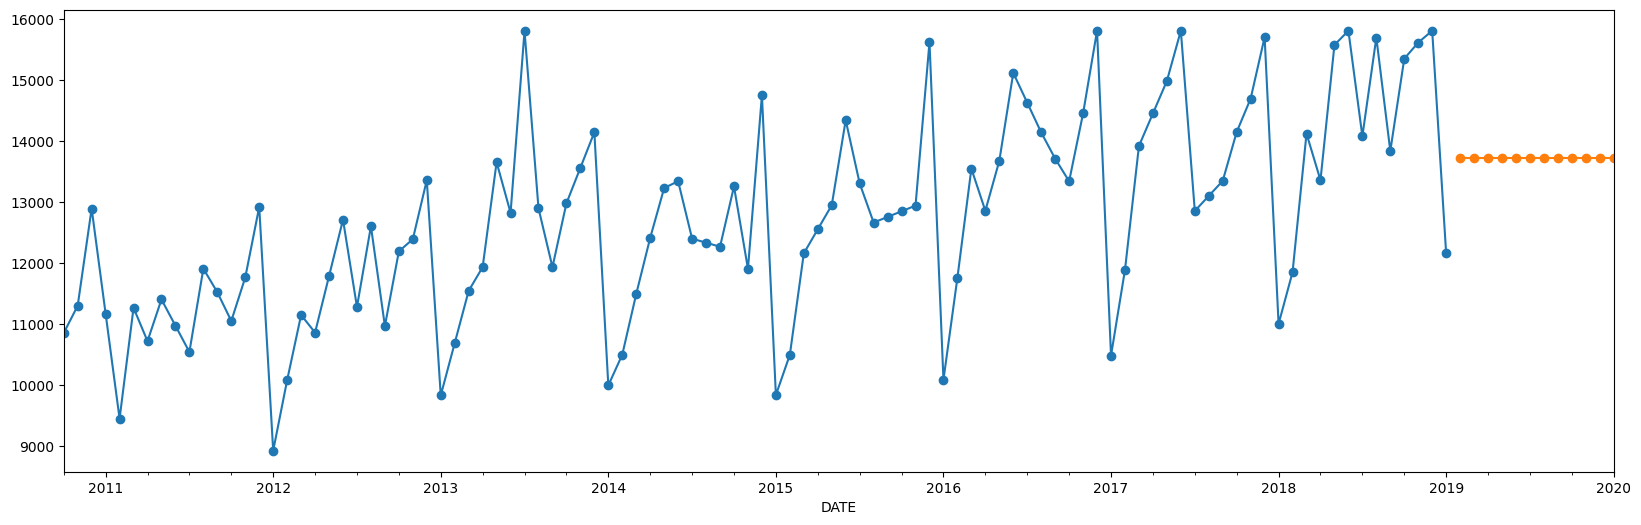

In [102]:
## Real y - real series from which i have fitted the SES model
mobile_sales.Sales.tail(100).plot(label='original', style='-o')
pred.plot(label = 'ses_pred', style = '-o')



## Double Exponential SMoothing

In [103]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend = 'add' ).fit(smoothing_level= 0.4)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


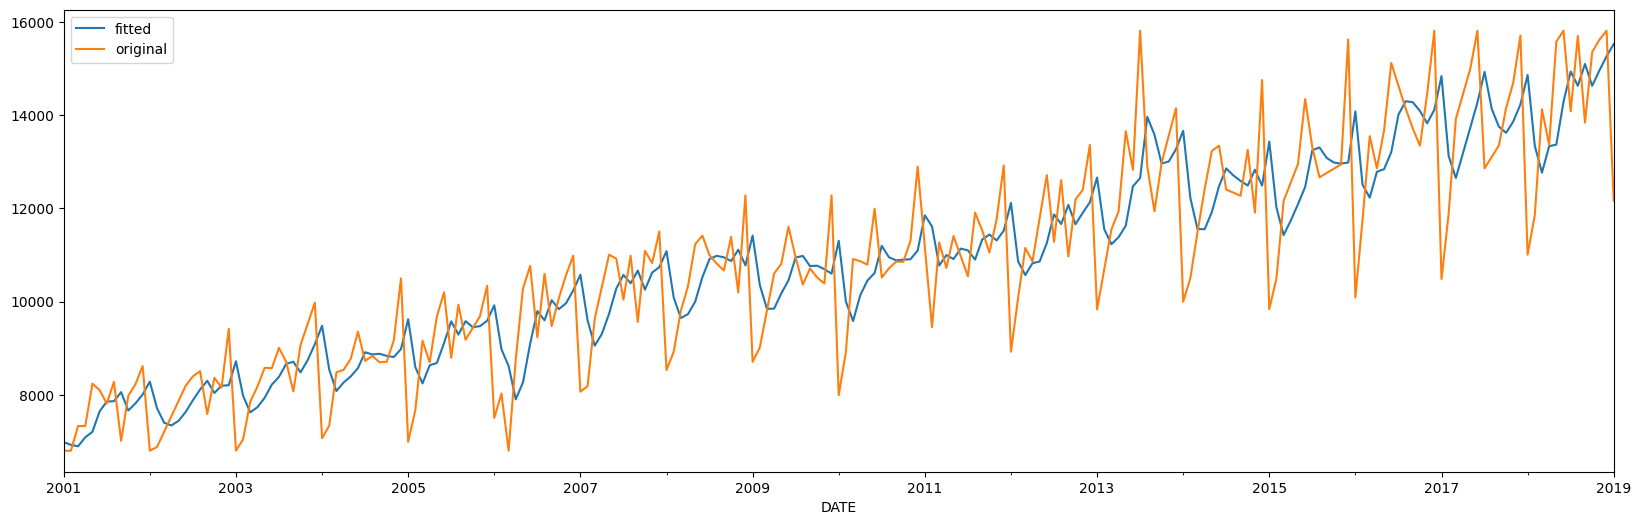

In [104]:
model.fittedvalues.plot(label='fitted')

mobile_sales.Sales.plot(label='original')

plt.legend()

In [105]:
pred = model.forecast(steps = 12)


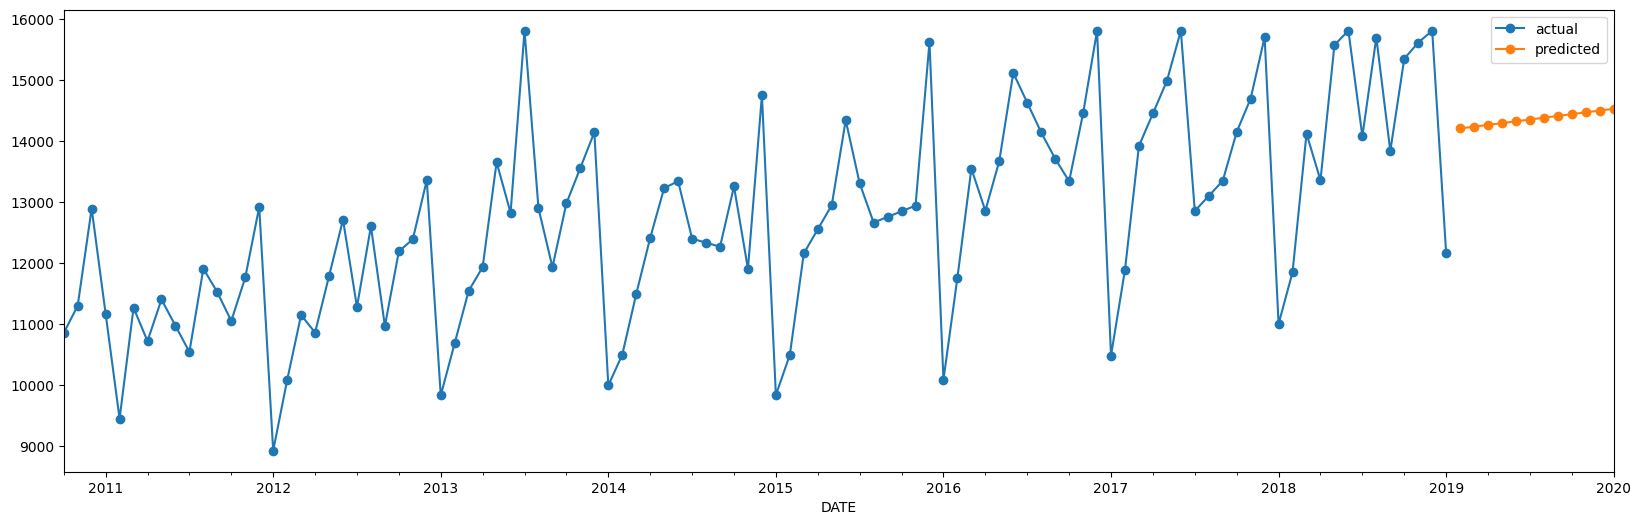

In [106]:
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

In [107]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add').fit(smoothing_level=1/(2*12))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [108]:
test_x['pred'] = model.forecast(steps = 12)

In [109]:
test_x

Sales          pred
DATE                             
2018-02-01  11852.0  14062.900233
2018-03-01  14123.0  14100.377239
2018-04-01  13360.0  14137.854245
2018-05-01  15576.0  14175.331251
2018-06-01  15809.4  14212.808257
2018-07-01  14080.0  14250.285262
2018-08-01  15697.0  14287.762268
2018-09-01  13838.0  14325.239274
2018-10-01  15351.0  14362.716280
2018-11-01  15615.0  14400.193286
2018-12-01  15809.4  14437.670292
2019-01-01  12160.0  14475.147298

<Axes: xlabel='DATE'>

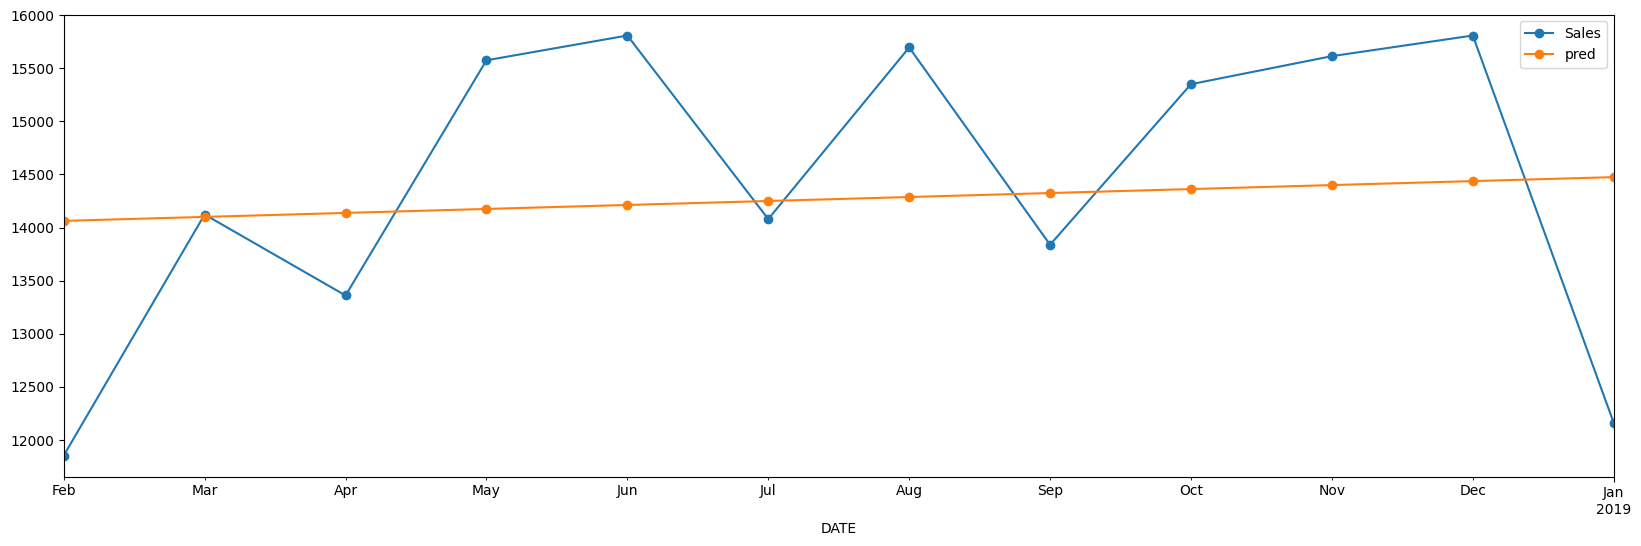

In [110]:
test_x.plot(style='-o')

In [111]:
performance(test_x['Sales'], test_x['pred'])


MAE : 1163.781
RMSE : 1352.497
MAPE: 0.083


## Triple Exponential

In [112]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend = 'add', seasonal = 'add' ).fit(smoothing_level= 0.4)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


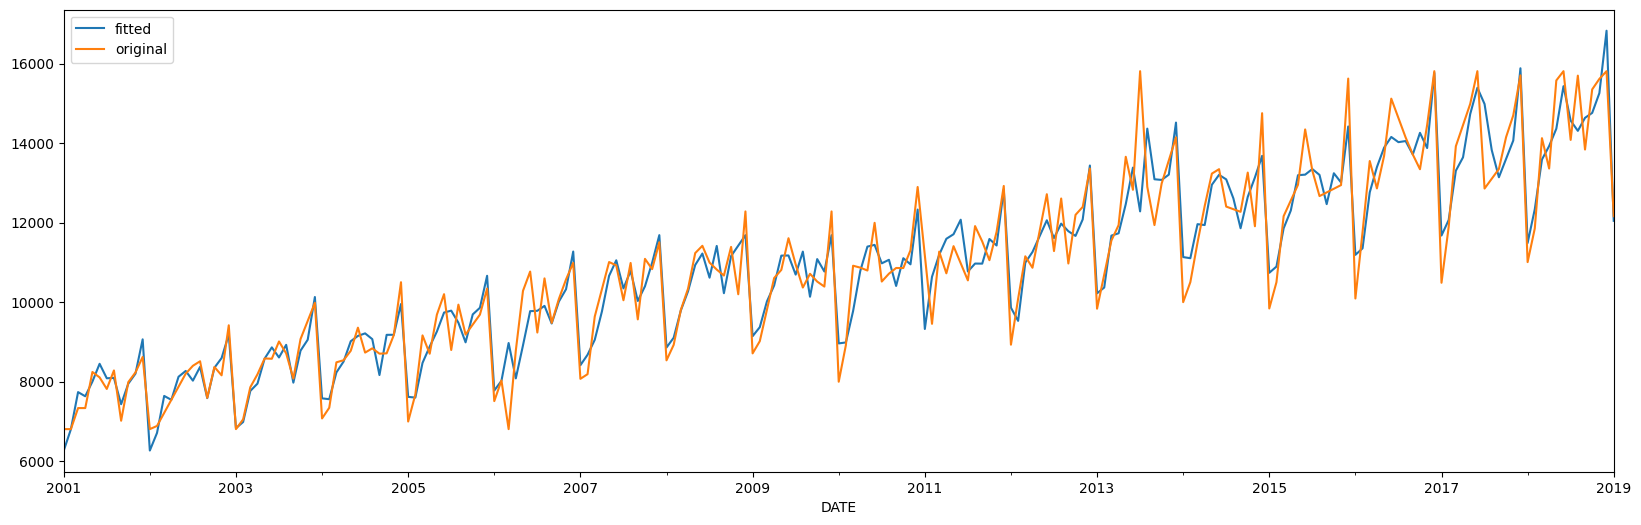

In [113]:
model.fittedvalues.plot(label = 'fitted')
mobile_sales.Sales.plot(label = 'original')
plt.legend()

In [114]:
pred = model.forecast(steps = 12)

<Axes: xlabel='DATE'>

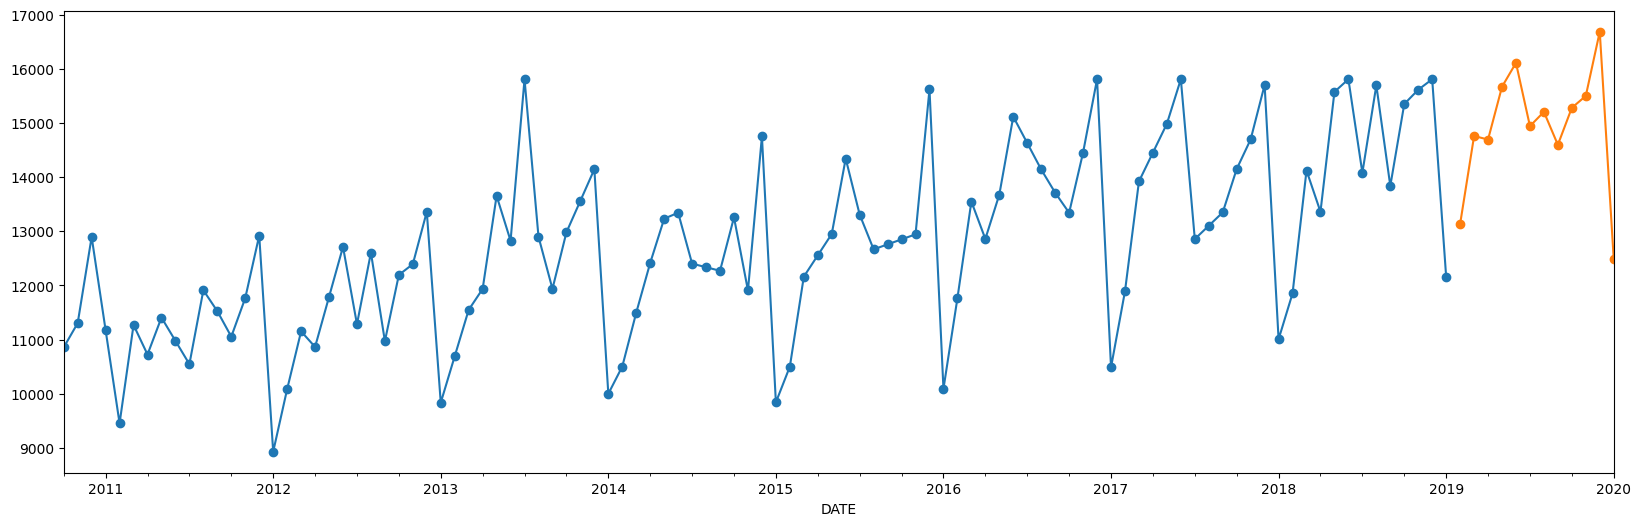

In [115]:
mobile_sales.Sales.tail(100).plot(style='-o')
pred.plot(style='-o')

In [116]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]

0.9789233920172065

In [117]:
def adf_test(dataset):

   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')

In [118]:
adf_test(mobile_sales.Sales)


Sequence is not stationary


## Stationarity

<Axes: xlabel='DATE'>

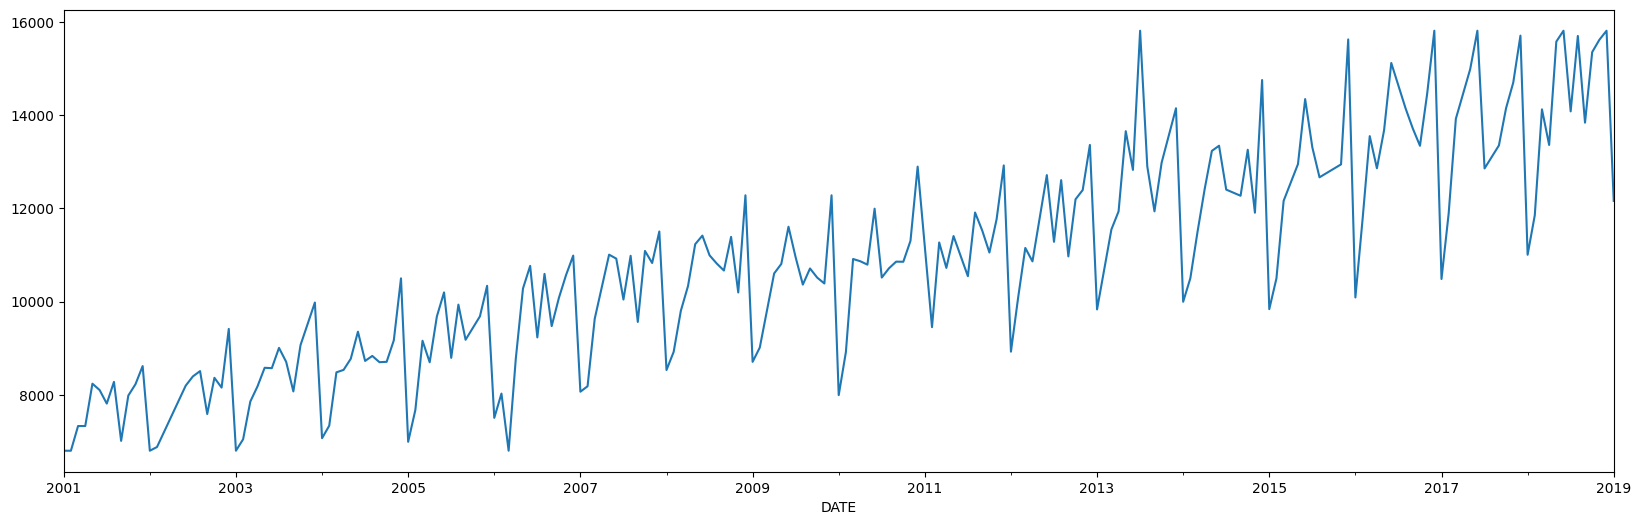

In [119]:
mobile_sales.Sales.plot()

In [120]:
a = mobile_sales.Sales

In [121]:
b  = mobile_sales.Sales.shift(1)

<Axes: xlabel='DATE'>

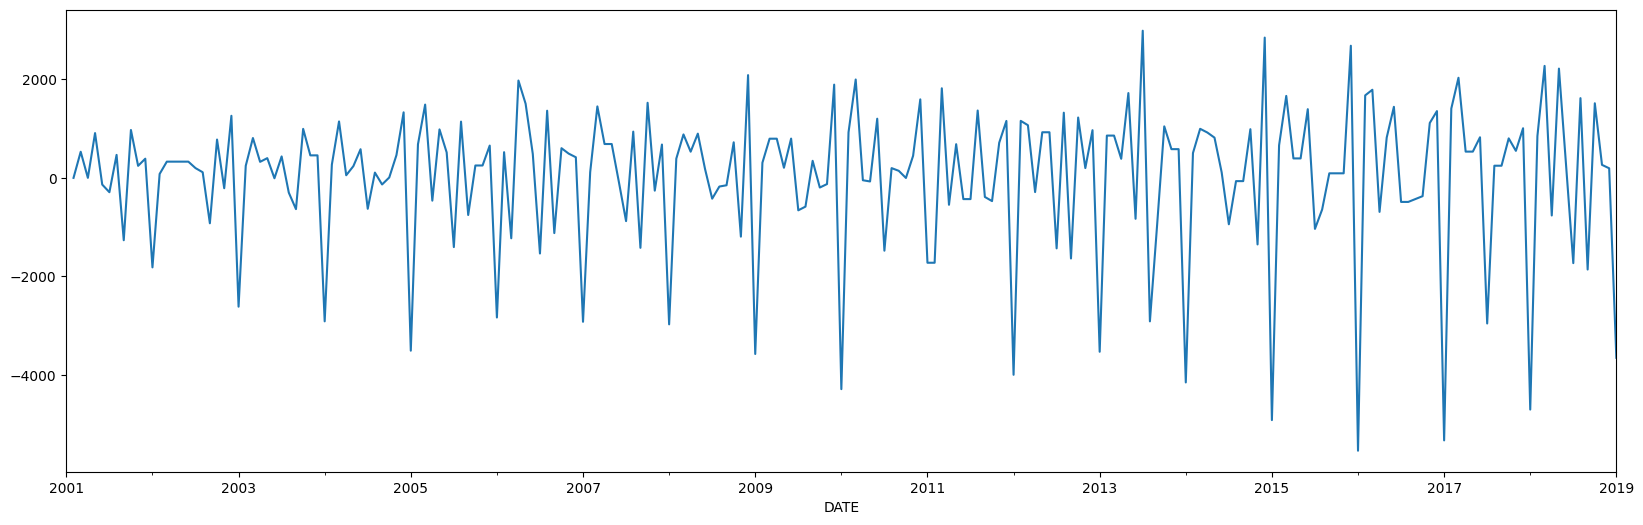

In [122]:
(a - b).plot()

<Axes: xlabel='DATE'>

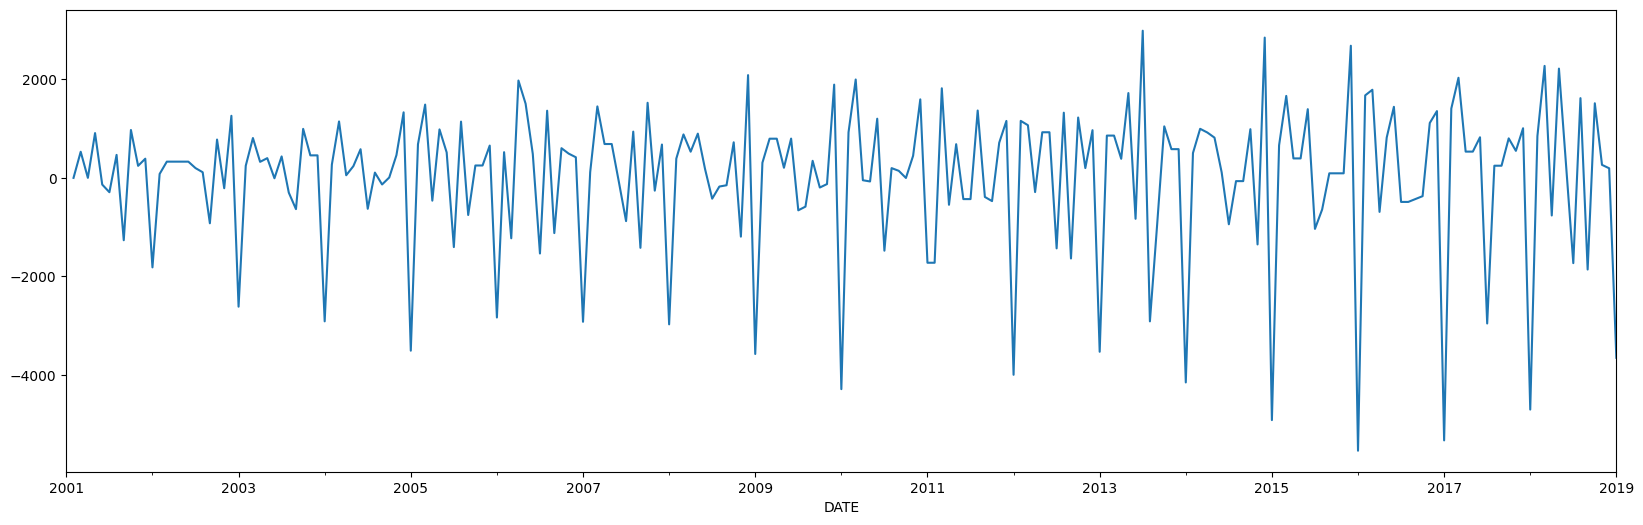

In [123]:
mobile_sales.Sales.diff().plot()  # df - df.shift(1) = df.diff()

In [124]:
detrended = mobile_sales.Sales.diff(1)

In [125]:
detrended

DATE
2001-01-01        NaN
2001-02-01       0.00
2001-03-01     529.56
2001-04-01       0.00
2001-05-01     908.00
               ...   
2018-09-01   -1859.00
2018-10-01    1513.00
2018-11-01     264.00
2018-12-01     194.40
2019-01-01   -3649.40
Name: Sales, Length: 217, dtype: float64

In [126]:
adf_test(detrended.dropna())

Sequence is stationary


<Axes: xlabel='DATE'>

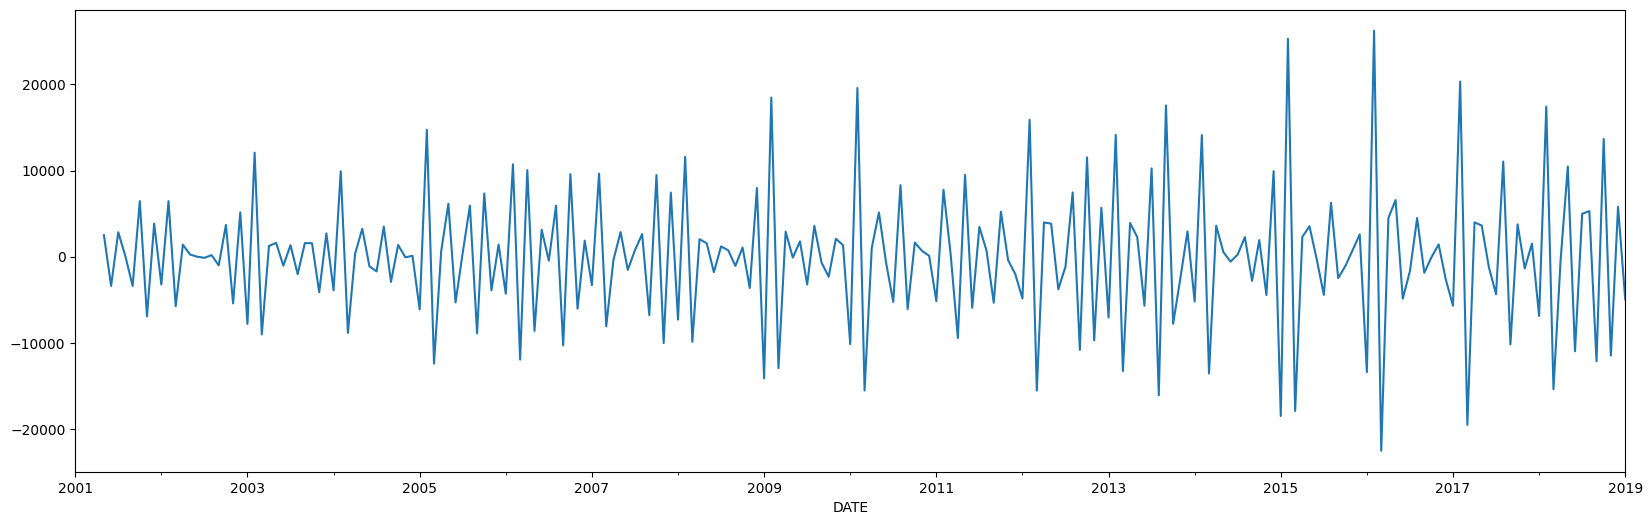

In [127]:
mobile_sales.Sales.diff().diff().diff().diff().plot()

## De - seasonalised

In [128]:
a = mobile_sales

In [129]:
b = mobile_sales.shift(12)

<Axes: xlabel='DATE'>

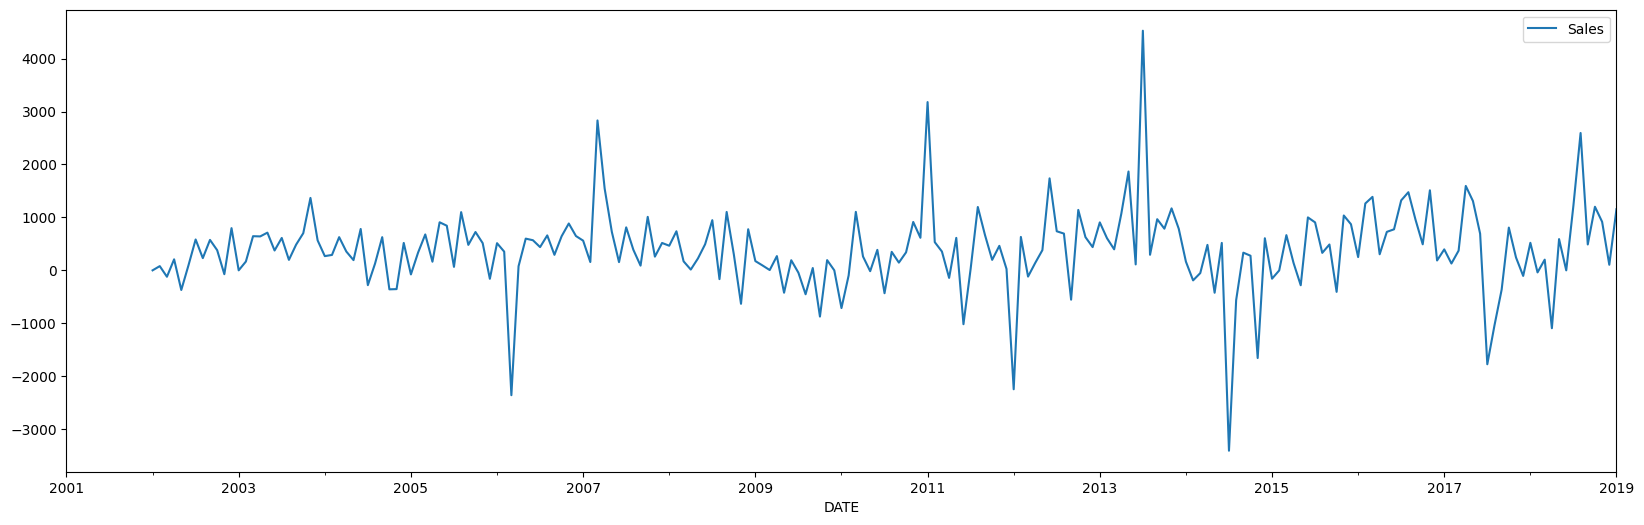

In [130]:
(a - b).plot()

In [131]:
deseasonalised = mobile_sales.Sales.diff(12)

<Axes: xlabel='DATE'>

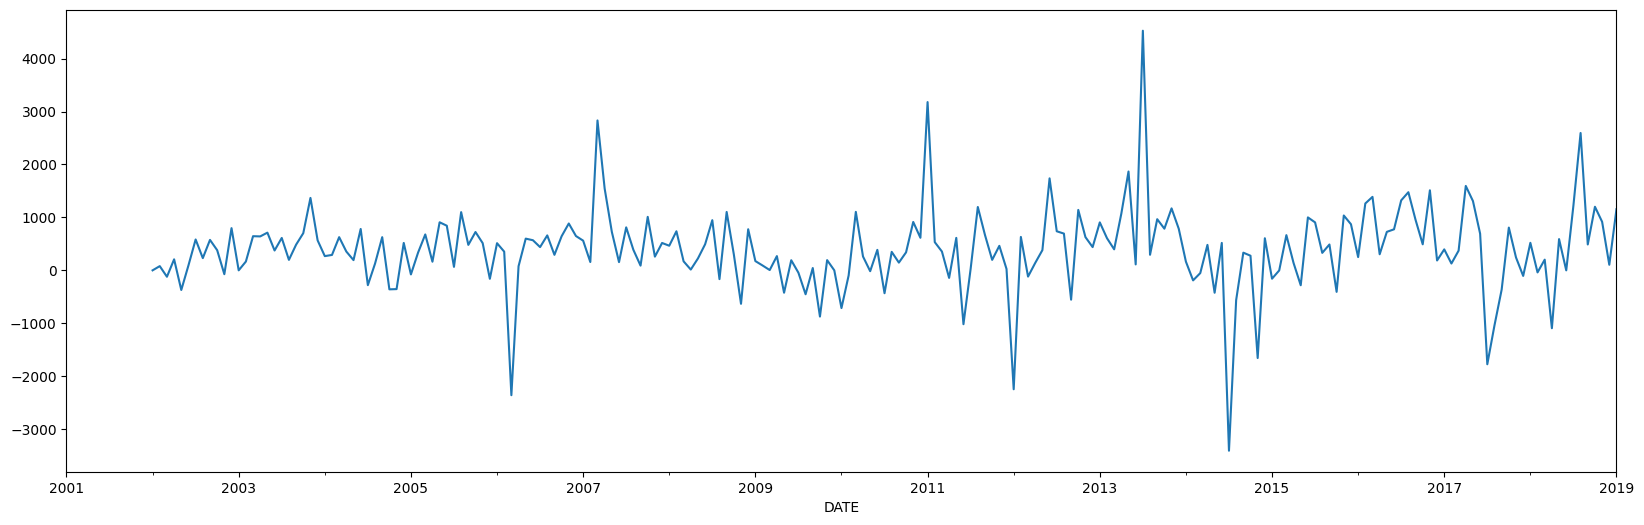

In [132]:
deseasonalised.plot()

## De trend #De seasonalised

In [133]:
stationary = mobile_sales.Sales.diff(1).diff(12)

<Axes: xlabel='DATE'>

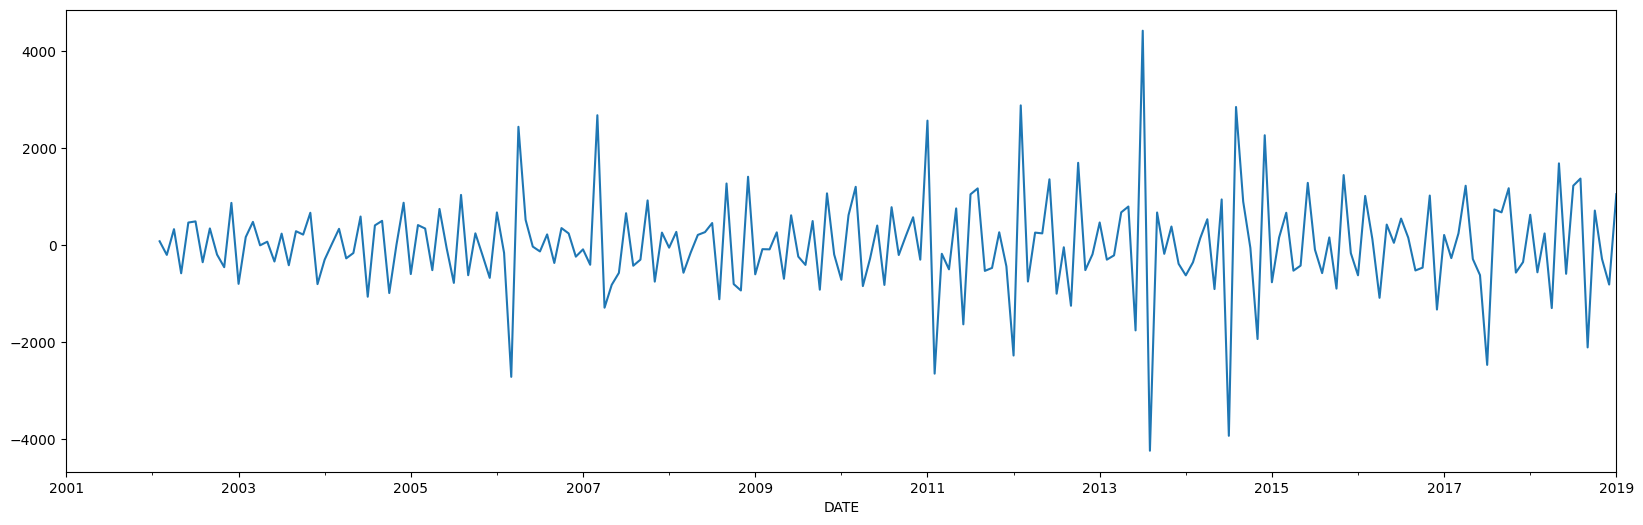

In [134]:
stationary.plot()

## ACF And PACF

In [135]:
mobile_sales.Sales.head()

DATE
2001-01-01    6802.44
2001-02-01    6802.44
2001-03-01    7332.00
2001-04-01    7332.00
2001-05-01    8240.00
Name: Sales, dtype: float64

In [136]:
mobile_sales.Sales.shift().head()

DATE
2001-01-01        NaN
2001-02-01    6802.44
2001-03-01    6802.44
2001-04-01    7332.00
2001-05-01    7332.00
Name: Sales, dtype: float64

In [137]:
lag = 5
np.corrcoef(mobile_sales.Sales[lag:], mobile_sales.Sales.shift(lag)[lag:])[0][1]

0.7397348808424007

## Direct functions '

In [138]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

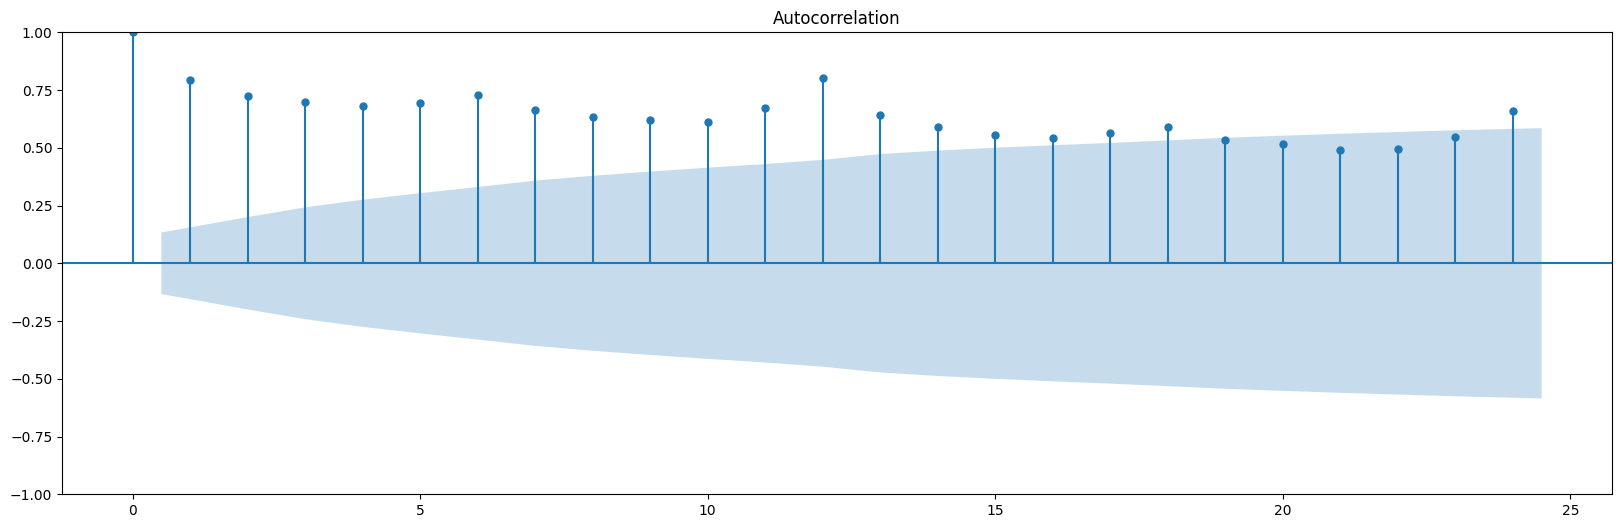

In [139]:
plot_acf(mobile_sales.Sales);

<Axes: xlabel='DATE'>

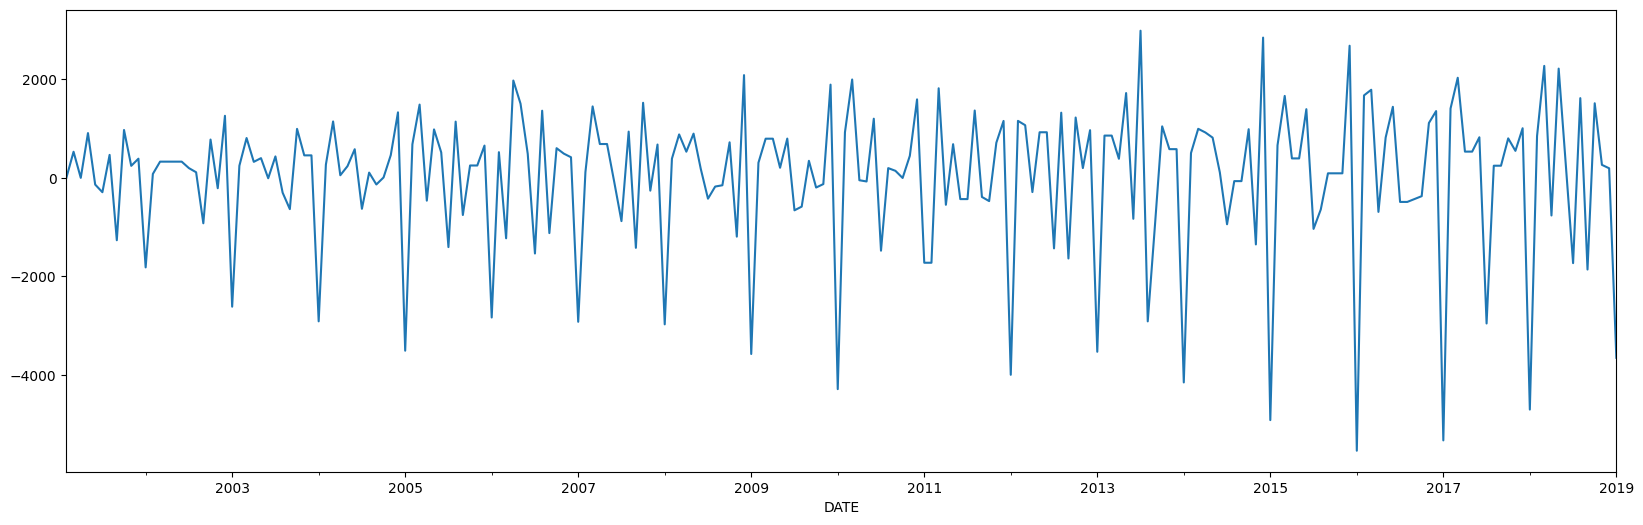

In [140]:
mobile_sales.Sales.diff().dropna().plot()

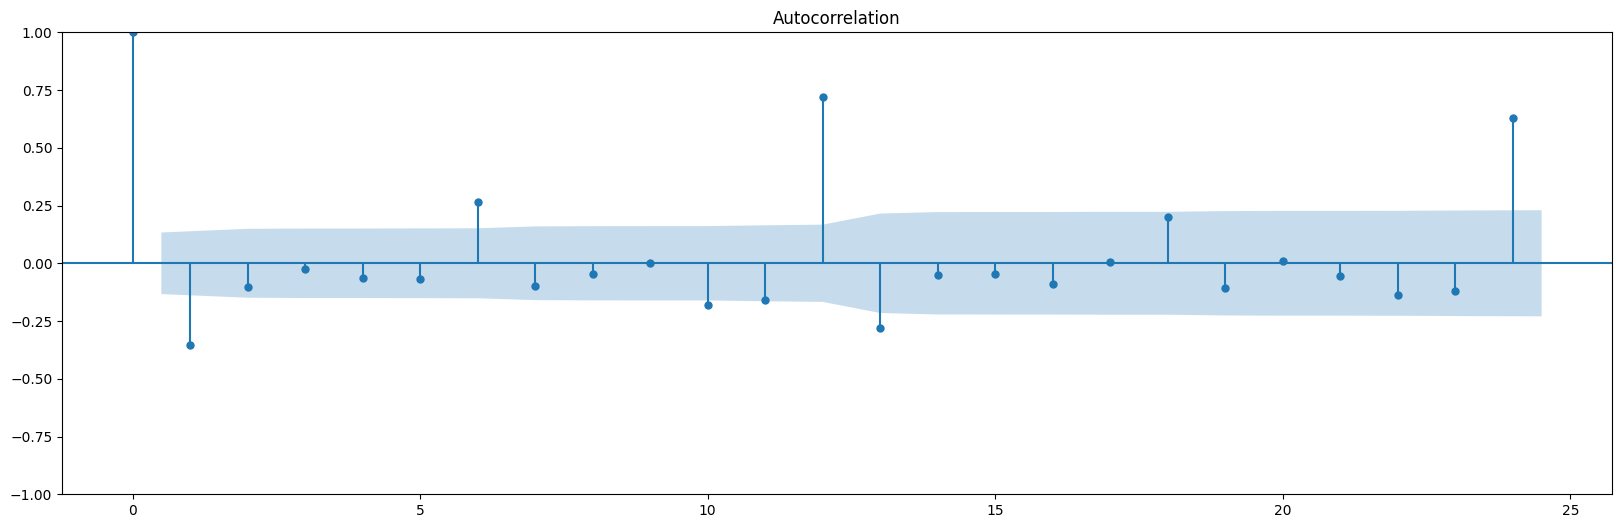

In [141]:
plot_acf(mobile_sales.Sales.diff().dropna());

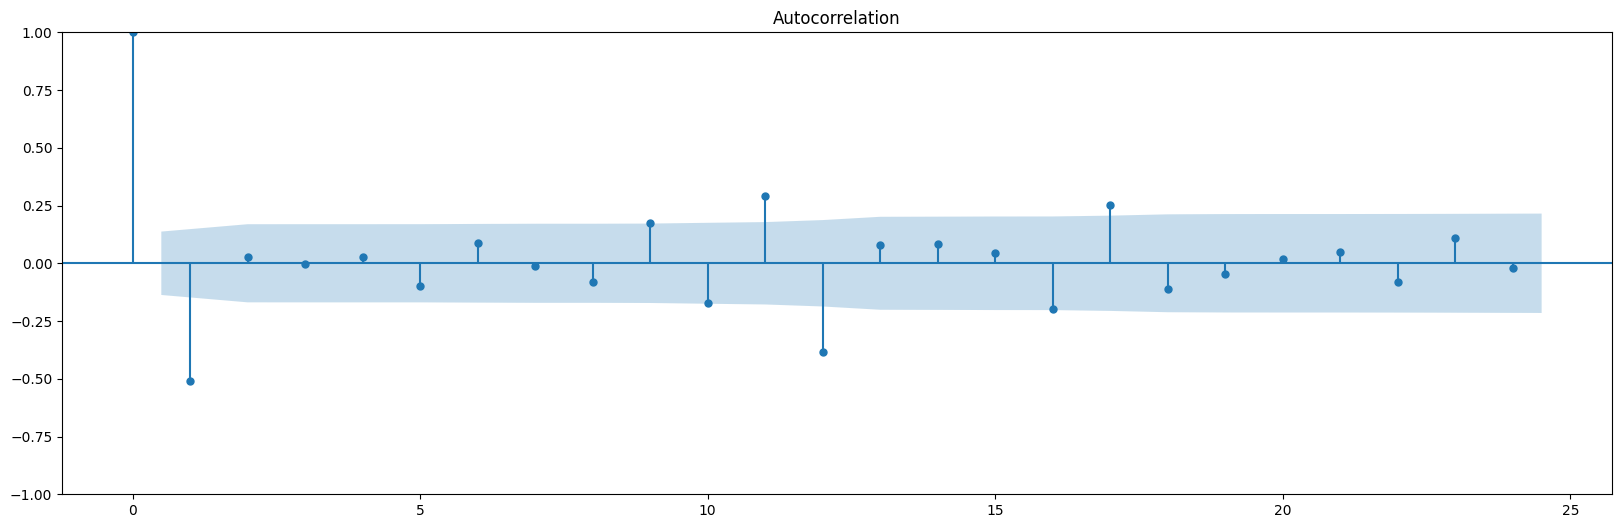

In [142]:
plot_acf(mobile_sales.Sales.diff().diff(12).dropna());

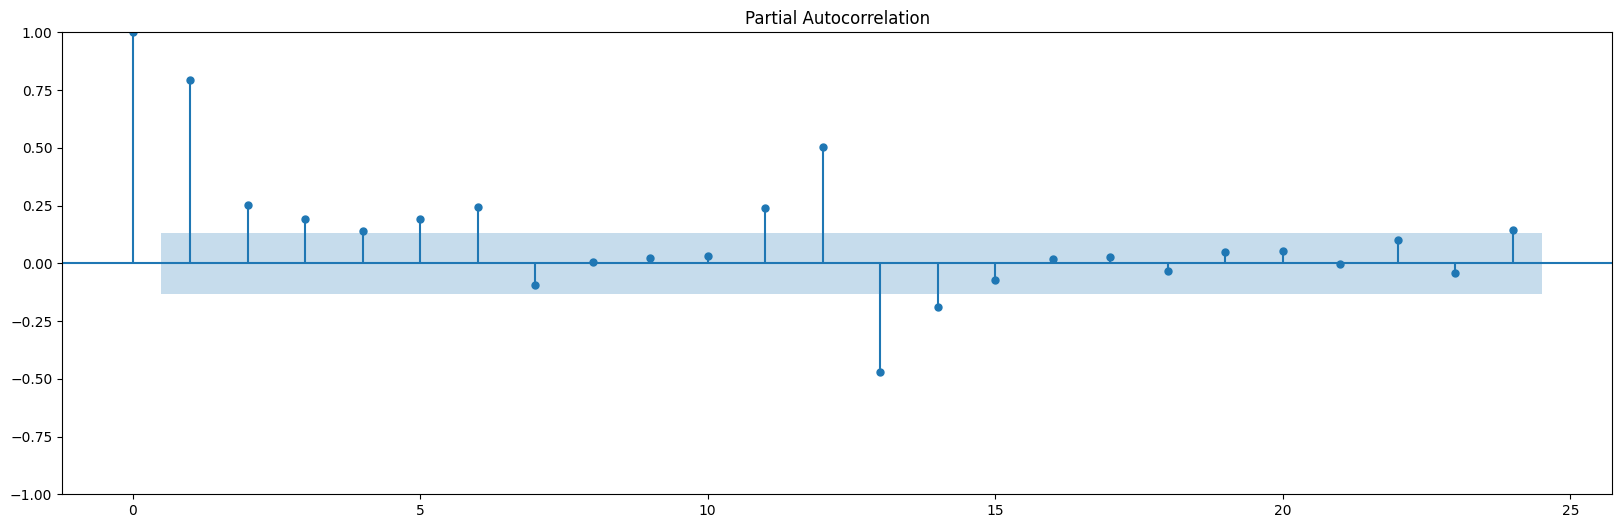

In [143]:
plot_pacf(mobile_sales.Sales);

<Axes: xlabel='DATE'>

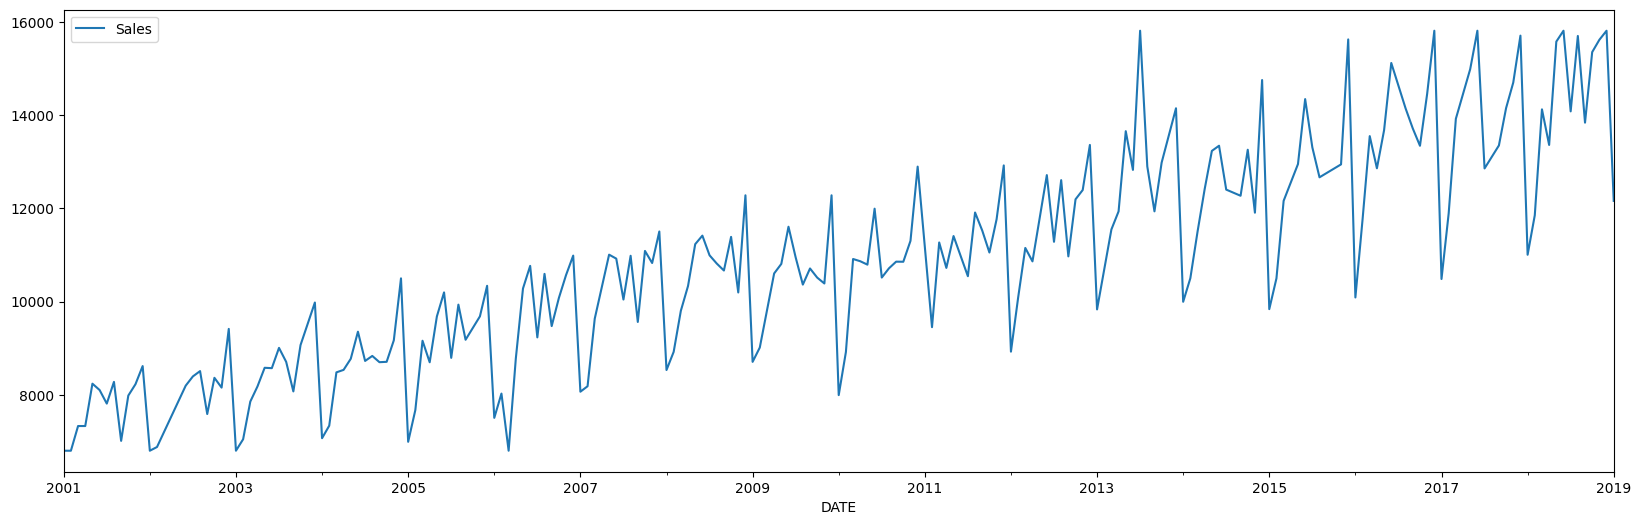

In [144]:
mobile_sales.plot()

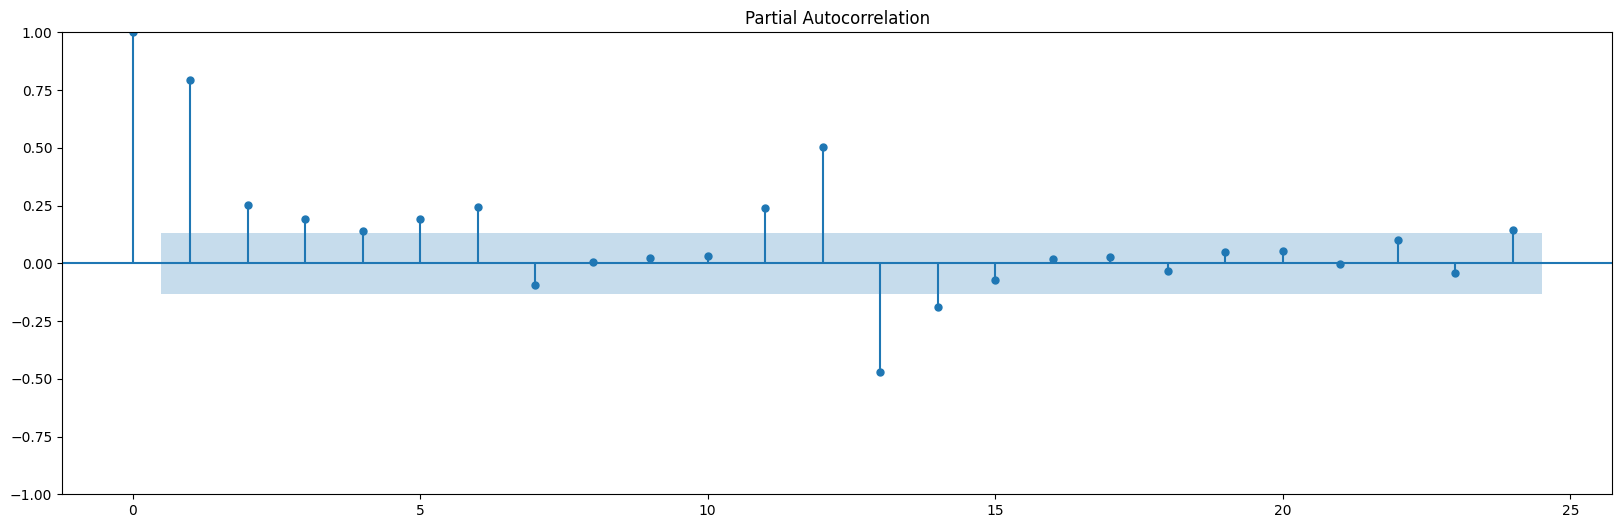

In [145]:
plot_pacf(mobile_sales.Sales);

## AR Process

In [146]:
train_x.head()

Sales
DATE               
2001-01-01  6802.44
2001-02-01  6802.44
2001-03-01  7332.00
2001-04-01  7332.00
2001-05-01  8240.00

<Axes: xlabel='DATE'>

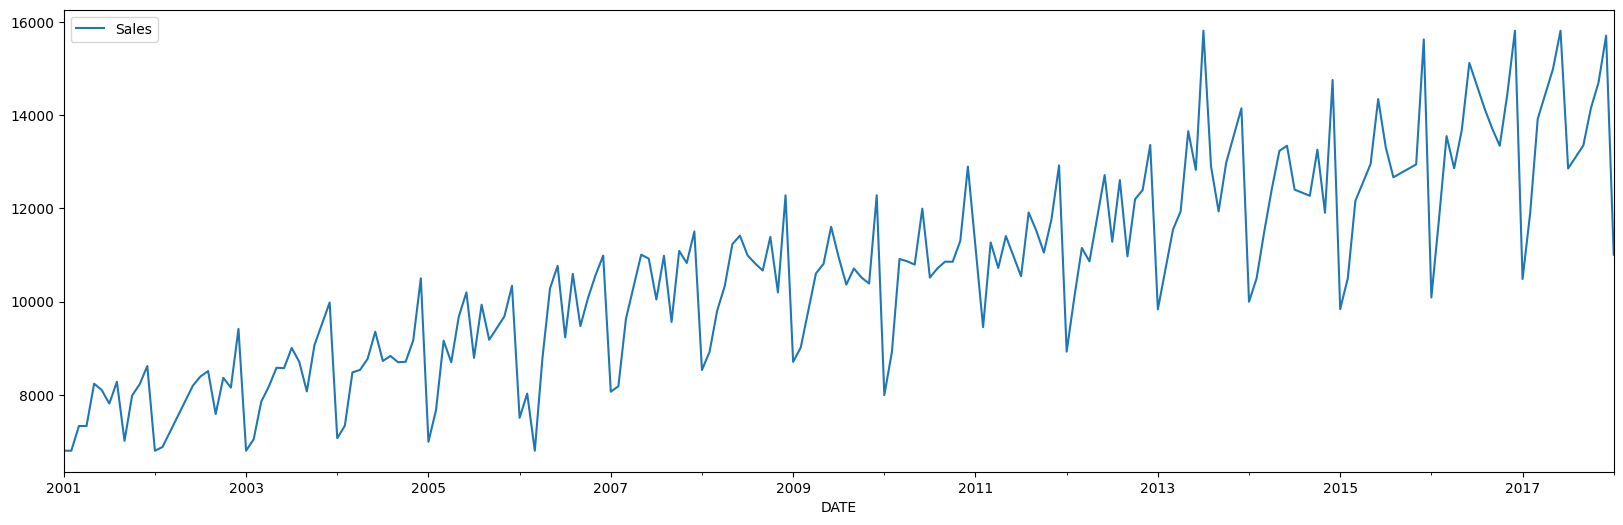

In [147]:
train_x.plot()

In [148]:
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')

In [149]:
adf_test(train_x.Sales)

Sequence is not stationary


In [150]:
train_x_st = train_x.copy()

In [151]:
train_x_st.Sales = train_x_st.Sales.diff(1)
train_x_st.dropna(inplace=True)

In [152]:
adf_test(train_x_st.Sales)


Sequence is stationary


In [153]:
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [154]:
model = SARIMAX(train_x_st.Sales, order = (1,0,0))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [155]:
model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.62455D+00    |proj g|=  1.68781D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   3.629D-06   8.625D+00
  F =   8.6245447743959538     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [156]:
forecast = model.get_forecast(steps=12)


AttributeError: 'SARIMAX' object has no attribute 'get_forecast'

In [ ]:
test_x['pred'] = model.predict(steps=12)

In [ ]:
test_x

In [ ]:
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(train_x_st.Sales, order=(1, 0, 0))

model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)
test_x['pred'].head(20)

In [157]:
test_x

Sales          pred
DATE                             
2018-02-01  11852.0  14062.900233
2018-03-01  14123.0  14100.377239
2018-04-01  13360.0  14137.854245
2018-05-01  15576.0  14175.331251
2018-06-01  15809.4  14212.808257
2018-07-01  14080.0  14250.285262
2018-08-01  15697.0  14287.762268
2018-09-01  13838.0  14325.239274
2018-10-01  15351.0  14362.716280
2018-11-01  15615.0  14400.193286
2018-12-01  15809.4  14437.670292
2019-01-01  12160.0  14475.147298

In [158]:
# INtegration

test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

/tmp/ipykernel_786/2419239451.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]


<Axes: xlabel='DATE'>

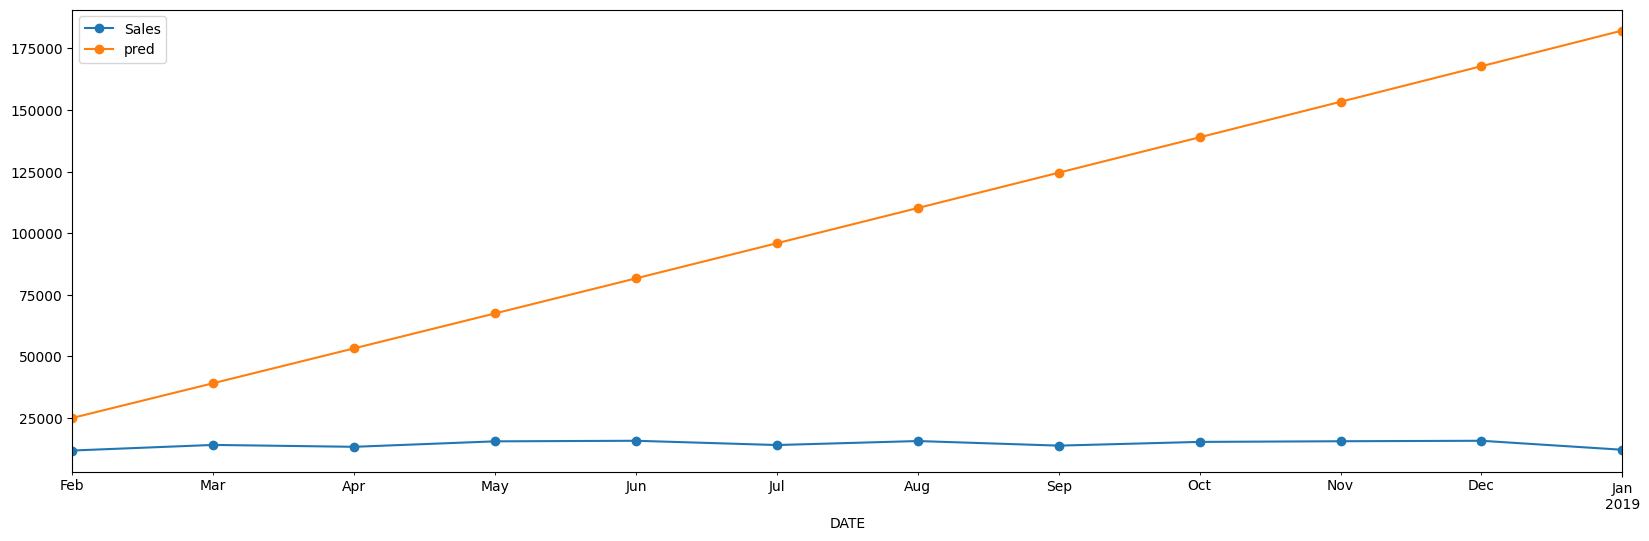

In [159]:
test_x.plot(style='-o')

In [160]:
performance(test_x['Sales'], test_x['pred'])


MAE : 88867.82
RMSE : 101478.926
MAPE: 6.14


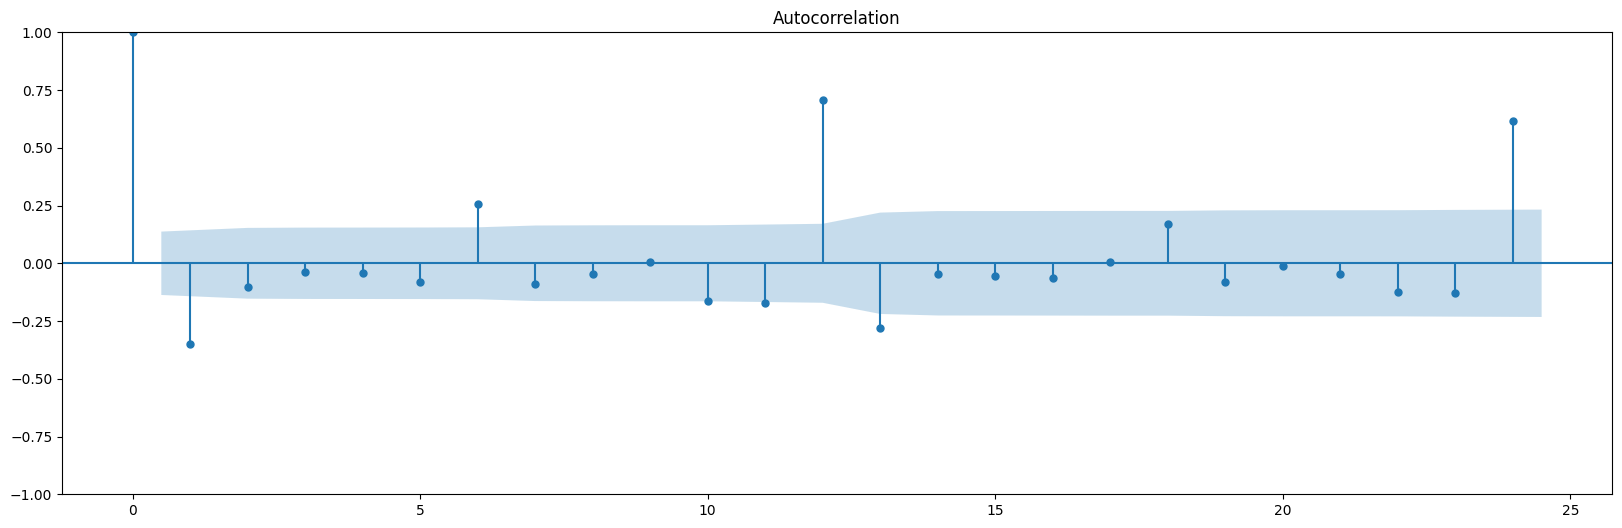

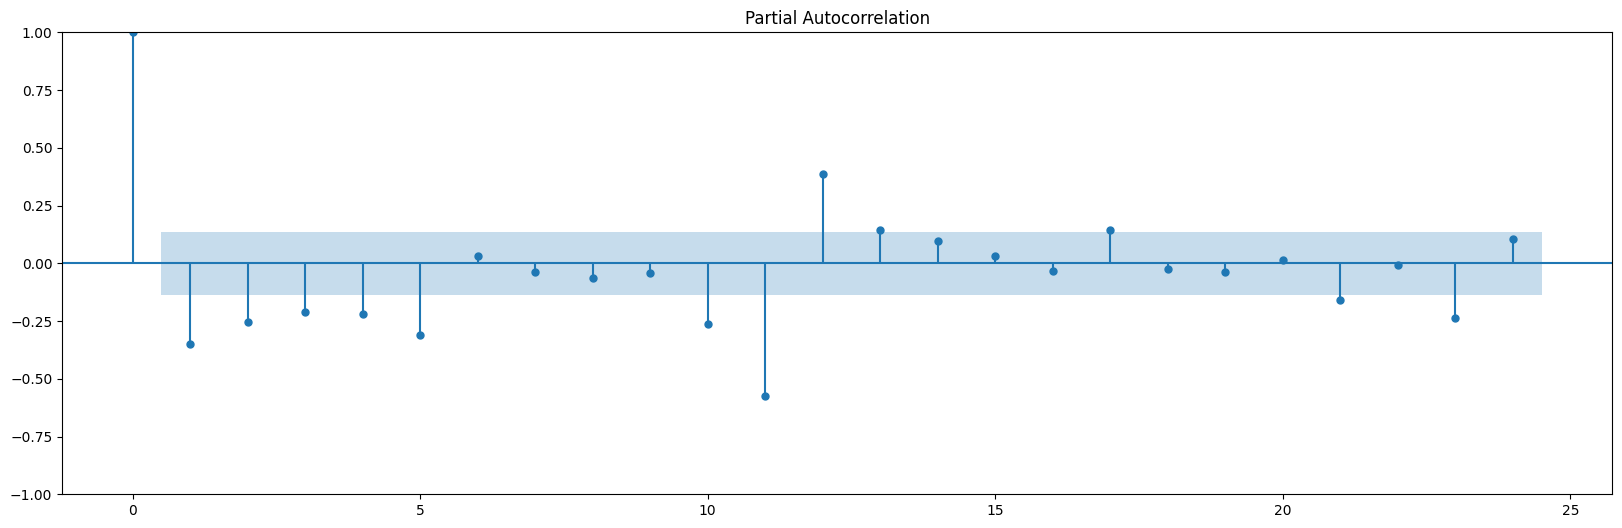

In [161]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(train_x_st.Sales);
plot_pacf(train_x_st.Sales);

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_786/1336592418.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]


MAE : 1647.061
RMSE : 1890.003
MAPE: 0.11


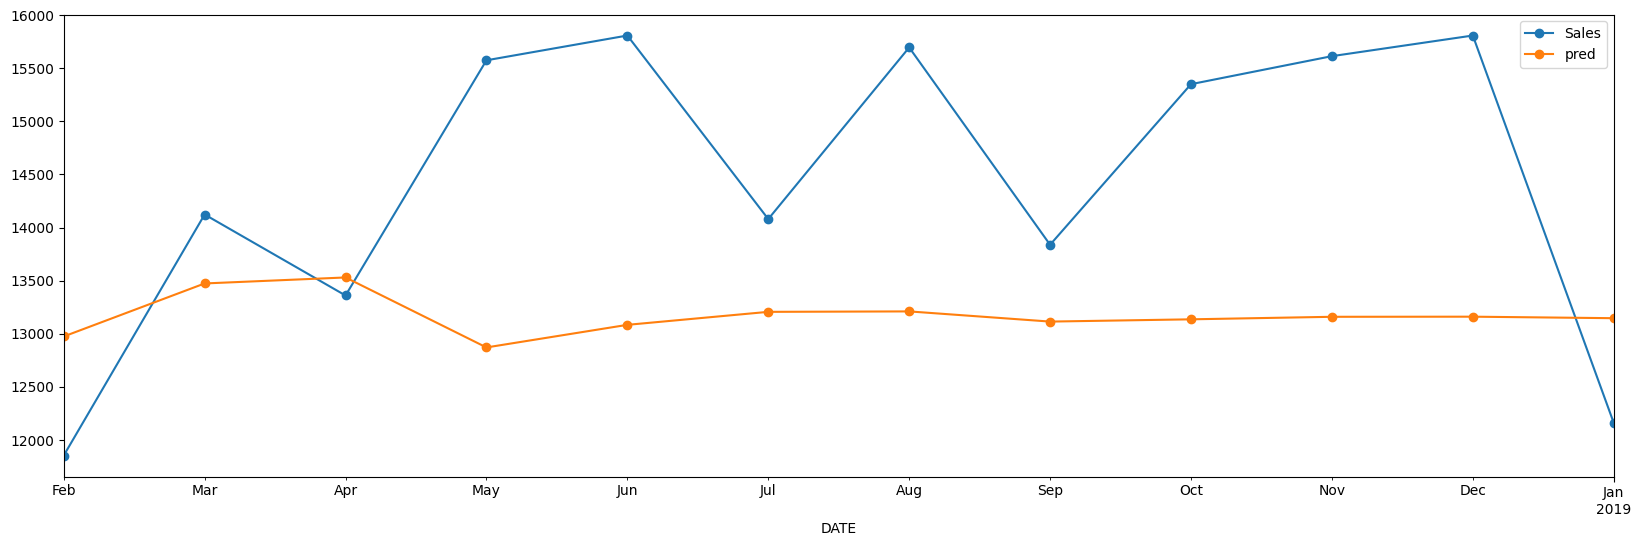

In [162]:
model = SARIMAX(train_x_st.Sales, order=(3, 0, 0))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)

# Integrating the trend back!
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

# Plotting
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## MA Process

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/tmp/ipykernel_786/1456323645.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]


MAE : 1320.348
RMSE : 1507.783
MAPE: 0.09


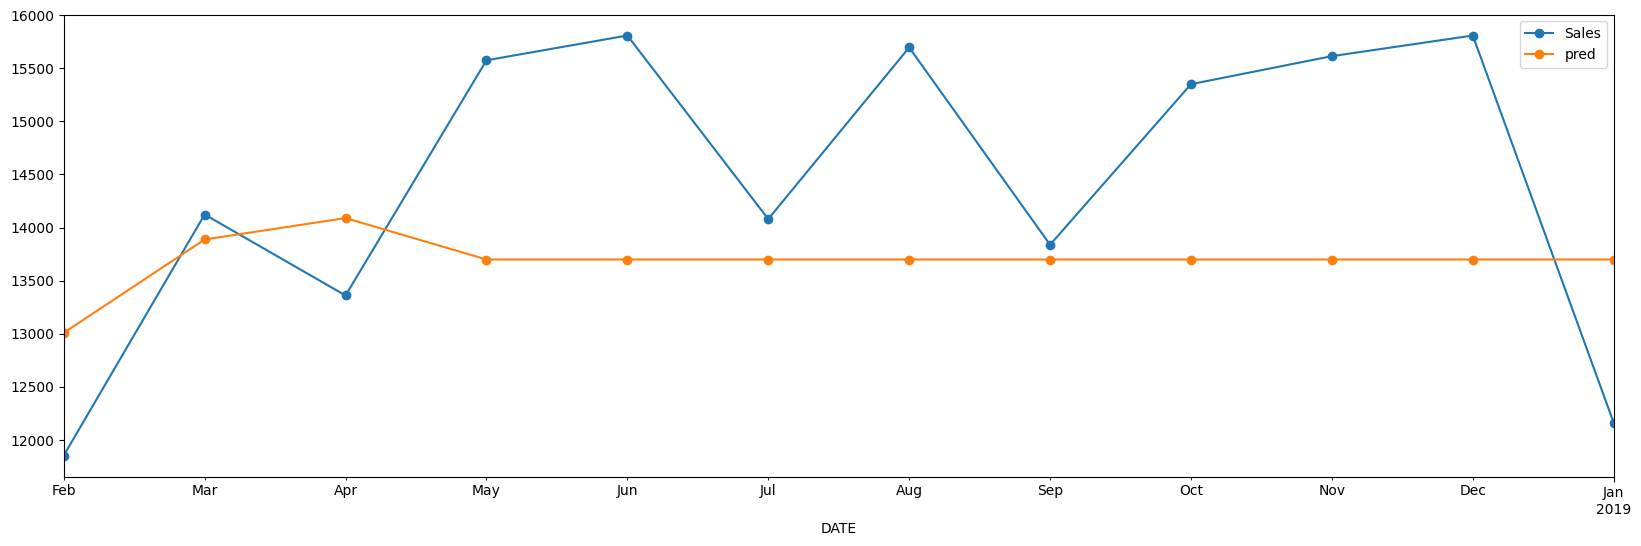

In [163]:
model = SARIMAX(train_x_st.Sales, order=(0, 0, 4))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)

# Integrating the trend back!
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

# Plotting
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1307.345
RMSE : 1529.03
MAPE: 0.088


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


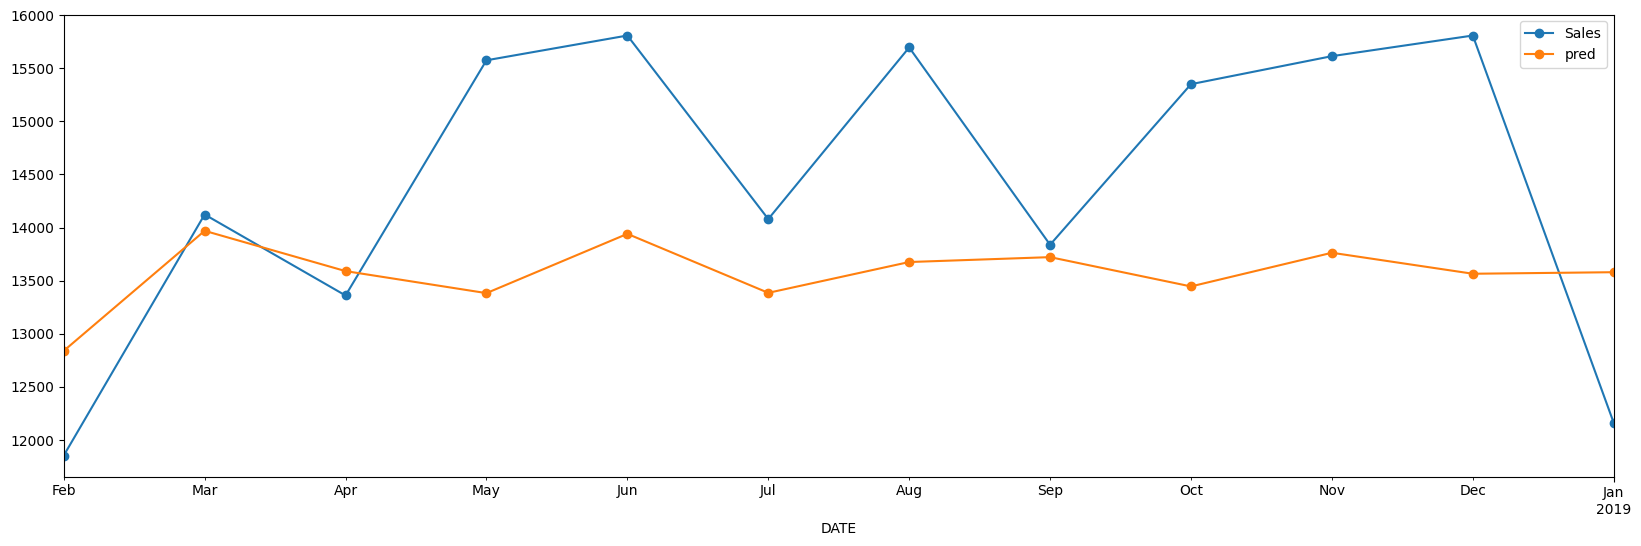

In [164]:
model = SARIMAX(train_x.Sales, order=(3, 1, 3))

model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)


# Plotting
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## ARMA (p,q)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1298.761
RMSE : 1521.207
MAPE: 0.088


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_786/2838282502.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]


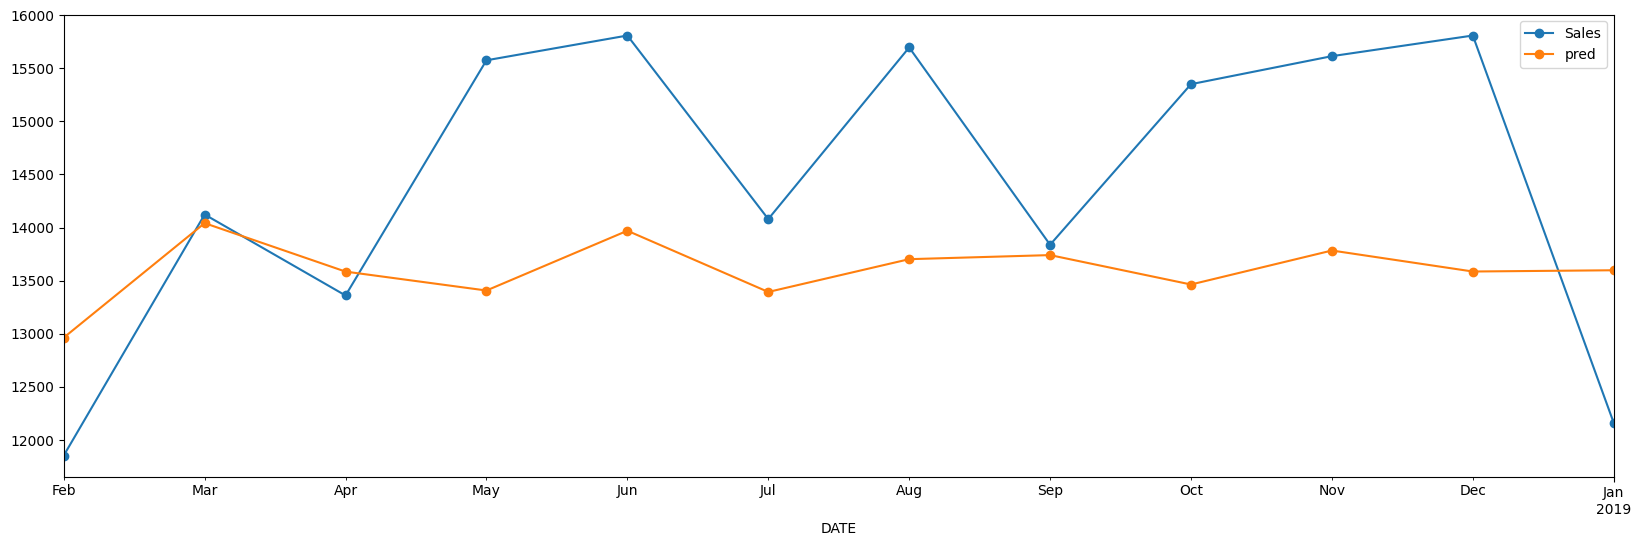

In [165]:
model = SARIMAX(train_x_st.Sales, order=(3, 0, 3))

model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)

# Integrating the trend back!
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

# Plotting
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1307.345
RMSE : 1529.03
MAPE: 0.088


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


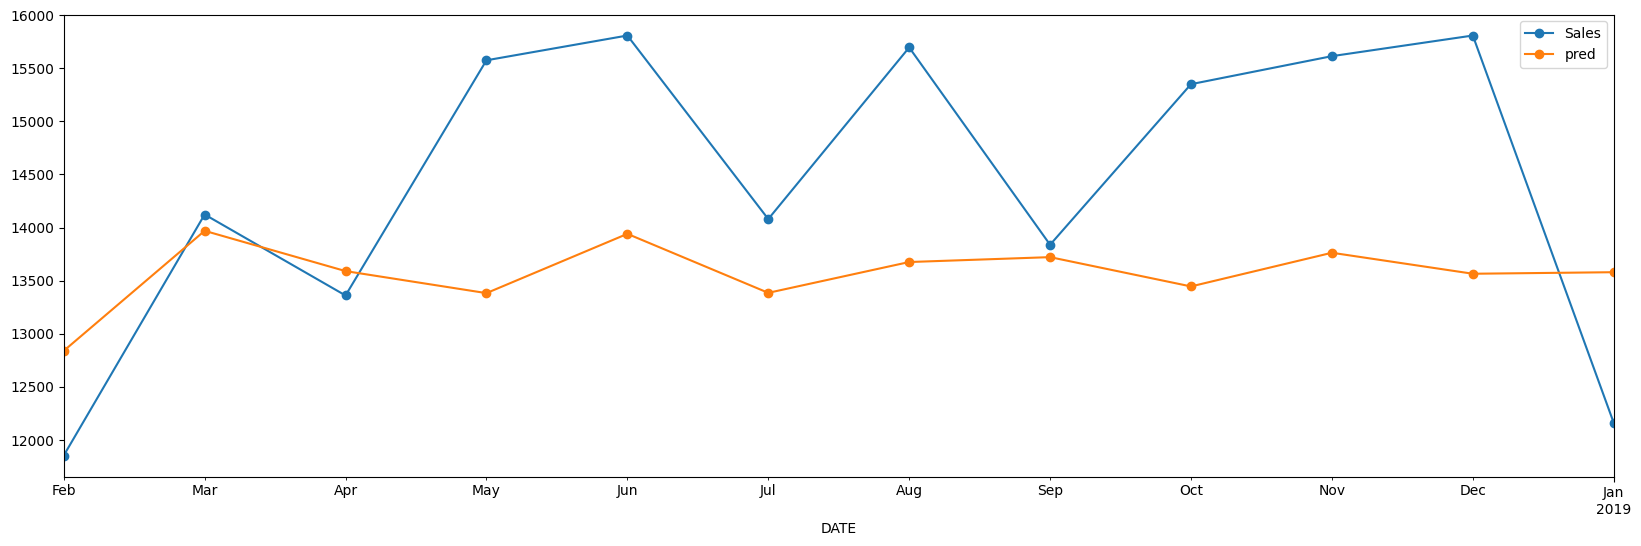

In [166]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.Sales, order=(3, 1, 3))

model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE : 1725.716
RMSE : 1951.8
MAPE: 0.116


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


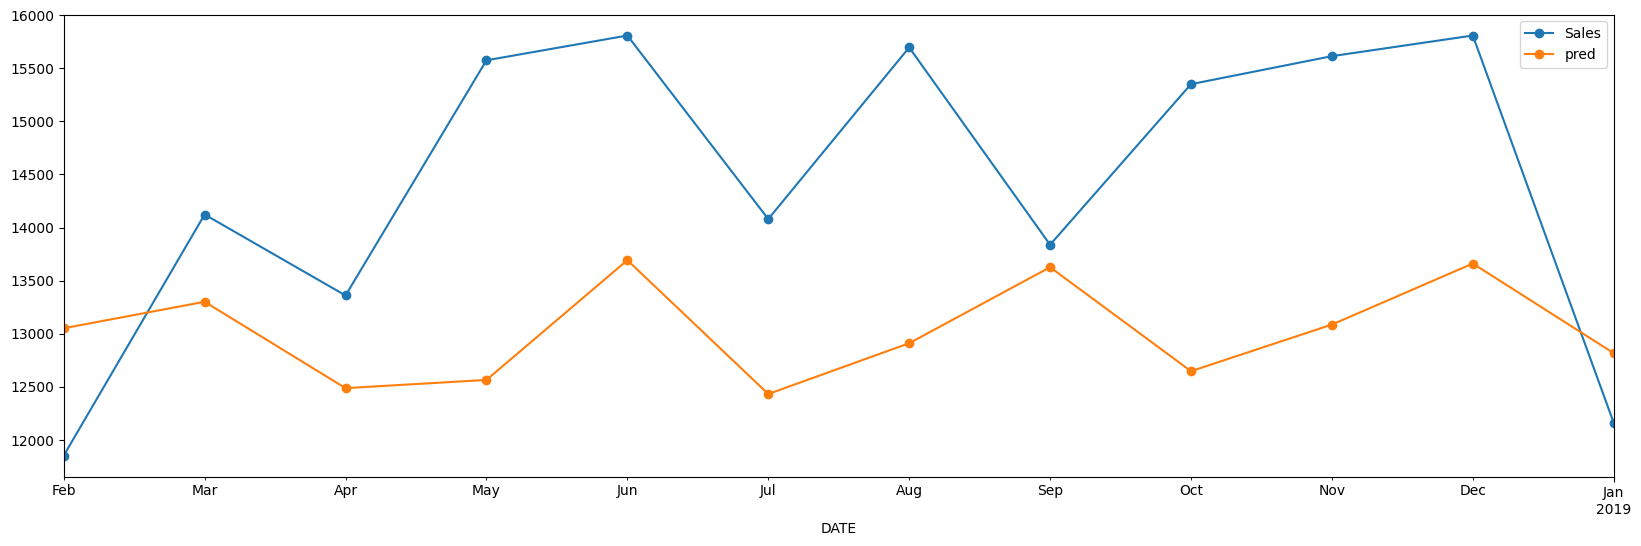

In [167]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.Sales, order=(3, 2, 3))

model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])